# Importing necessary libralies

In [1]:
import pandas as pd
from IPython.display import display
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklego.meta import ZeroInflatedRegressor
import plotly.express as px
from scipy.stats import yeojohnson,skew
from sklearn.pipeline import Pipeline, make_pipeline
import numpy as np
from math import sqrt
from sklearn.metrics import mutual_info_score
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
#SHowing all columns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Defining the function for data wrangling

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    df.drop_duplicates(inplace=True)

    drop_cols = [col for col in df.columns if 'climate_swe' in col]
     
    df.drop(columns=drop_cols, inplace=True)

    return df

In [5]:
#Loading our data
df=wrangle(r"C:\Users\Ethel\Downloads\Zindi First hackathon\Train.csv")
df.head()

ID        lat        lon  burn_area  climate_aet  climate_def  \
0  0_2001-01-01 -15.858835  29.237029        0.0         1195            0   
1  1_2001-01-01 -15.858835  29.487029        0.0         1196            0   
2  2_2001-01-01 -15.858835  29.737029        0.0         1190            0   
3  3_2001-01-01 -15.858835  29.987029        0.0         1144            0   
4  4_2001-01-01 -15.858835  30.237029        0.0         1187            0   

   climate_pdsi  climate_pet  climate_pr  climate_ro  climate_soil  \
0           263         1195         206          10          1692   
1           232         1196         201          10          1859   
2           314         1190         192          10          1677   
3           321         1144         186          66          1061   
4           413         1187         186           9          1714   

   climate_srad  climate_tmmn  climate_tmmx  climate_vap  climate_vpd  \
0          1861           211           317         2493          111   
1          1867           211           318         2497          112   
2          1861           208           317         2486          109   
3          1864           196           303         2333           98   
4          1852           204           314         2426          109   

   climate_vs   elevation  landcover_0  landcover_1  landcover_2  landcover_3  \
0         141  413.474762          0.0          0.0     0.018654          0.0   
1         138  429.034543          0.0          0.0     0.000000          0.0   
2         141  477.246432          0.0          0.0     0.000000          0.0   
3         124  646.388681          0.0          0.0     0.000000          0.0   
4         145  582.340637          0.0          0.0     0.000000          0.0   

   landcover_4  landcover_5  landcover_6  landcover_7  landcover_8  \
0     0.714446     0.012174     0.244890     0.009836          0.0   
1     0.654783     0.000095     0.345121     0.000000          0.0   
2     0.516421     0.000000     0.483579     0.000000          0.0   
3     0.299000     0.163902     0.537098     0.000000          0.0   
4     0.277392     0.067742     0.654866     0.000000          0.0   

   precipitation  
0       0.256932  
1       0.273093  
2       0.285109  
3       0.298418  
4       0.315621

# Doing analysis for our data

In [6]:
df.isnull().sum()

ID               0
lat              0
lon              0
burn_area        0
climate_aet      0
climate_def      0
climate_pdsi     0
climate_pet      0
climate_pr       0
climate_ro       0
climate_soil     0
climate_srad     0
climate_tmmn     0
climate_tmmx     0
climate_vap      0
climate_vpd      0
climate_vs       0
elevation        0
landcover_0      0
landcover_1      0
landcover_2      0
landcover_3      0
landcover_4      0
landcover_5      0
landcover_6      0
landcover_7      0
landcover_8      0
precipitation    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83148 entries, 0 to 83147
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             83148 non-null  object 
 1   lat            83148 non-null  float64
 2   lon            83148 non-null  float64
 3   burn_area      83148 non-null  float64
 4   climate_aet    83148 non-null  int64  
 5   climate_def    83148 non-null  int64  
 6   climate_pdsi   83148 non-null  int64  
 7   climate_pet    83148 non-null  int64  
 8   climate_pr     83148 non-null  int64  
 9   climate_ro     83148 non-null  int64  
 10  climate_soil   83148 non-null  int64  
 11  climate_srad   83148 non-null  int64  
 12  climate_tmmn   83148 non-null  int64  
 13  climate_tmmx   83148 non-null  int64  
 14  climate_vap    83148 non-null  int64  
 15  climate_vpd    83148 non-null  int64  
 16  climate_vs     83148 non-null  int64  
 17  elevation      83148 non-null  float64
 18  landco

# Checking the Mean, Max, STD to see if our data is normally distributed or skewed

In [8]:
df_copy=df.copy()

Taking numerical columns to do our analysis

In [10]:
numerical_dataframe=df_copy.select_dtypes(include=['float64', 'int'])

In [11]:
numerical_dataframe.describe()

lat           lon     burn_area   climate_aet   climate_def  \
count  83148.000000  83148.000000  83148.000000  83148.000000  83148.000000   
mean     -19.014557     29.860856      0.007632    484.491124    828.892721   
std        1.588444      1.751090      0.029226    470.467480    546.934469   
min      -22.358835     25.487029      0.000000      0.000000      0.000000   
25%      -20.358835     28.487029      0.000000     50.000000    375.000000   
50%      -18.858835     29.987029      0.000000    302.000000    858.000000   
75%      -17.858835     31.237029      0.000000    931.000000   1211.000000   
max      -15.858835     32.987029      0.843886   1713.000000   2614.000000   

       climate_pdsi   climate_pet    climate_pr    climate_ro  climate_soil  \
count  83148.000000  83148.000000  83148.000000  83148.000000  83148.000000   
mean     -30.806237   1313.382992     54.576322      6.215134    305.477919   
std      235.802930    315.209838     71.997561     21.480399    400.956123   
min     -563.000000    587.000000      0.000000      0.000000      1.000000   
25%     -212.000000   1081.000000      1.000000      0.000000     70.000000   
50%     -108.000000   1290.000000     22.000000      1.000000    149.000000   
75%      142.000000   1517.000000     87.000000      4.000000    329.000000   
max      851.000000   2620.000000    501.000000    342.000000   3319.000000   

       climate_srad  climate_tmmn  climate_tmmx   climate_vap   climate_vpd  \
count  83148.000000  83148.000000  83148.000000  83148.000000  83148.000000   
mean    2281.967901    140.830303    285.288654   1554.532123    127.380117   
std      333.049616     44.631924     34.840502    458.461471     44.172381   
min     1167.000000     19.000000    139.000000    704.000000     32.000000   
25%     2028.000000    103.000000    262.000000   1139.000000     97.000000   
50%     2272.000000    150.000000    287.000000   1544.000000    118.000000   
75%     2545.000000    177.000000    310.000000   1942.000000    149.000000   
max     3170.000000    244.000000    400.000000   2786.000000    344.000000   

         climate_vs     elevation   landcover_0   landcover_1   landcover_2  \
count  83148.000000  83148.000000  83148.000000  83148.000000  83148.000000   
mean     208.414574    978.992612      0.006158      0.000017      0.008583   
std       47.550163    297.497348      0.053111      0.000141      0.059046   
min       48.000000    265.379418      0.000000      0.000000      0.000000   
25%      174.000000    768.375959      0.000000      0.000000      0.000000   
50%      205.000000   1022.813217      0.000000      0.000000      0.000000   
75%      241.000000   1197.977194      0.000000      0.000000      0.000000   
max      393.000000   1771.930689      0.828131      0.004918      0.711603   

        landcover_3   landcover_4   landcover_5   landcover_6   landcover_7  \
count  8.314800e+04  83148.000000  83148.000000  83148.000000  83148.000000   
mean   4.066313e-08      0.160628      0.037453      0.785382      0.000354   
std    3.535121e-06      0.192957      0.106050      0.233953      0.001773   
min    0.000000e+00      0.000000      0.000000      0.000019      0.000000   
25%    0.000000e+00      0.014993      0.000000      0.655322      0.000000   
50%    0.000000e+00      0.076706      0.000139      0.880600      0.000000   
75%    0.000000e+00      0.246498      0.015166      0.971209      0.000000   
max    3.073689e-04      0.981472      0.881323      1.000000      0.016708   

        landcover_8  precipitation  
count  83148.000000   83148.000000  
mean       0.001424       0.078551  
std        0.014233       0.104464  
min        0.000000       0.000000  
25%        0.000000       0.002017  
50%        0.000000       0.028503  
75%        0.000000       0.125500  
max        0.301823       0.801328

In [12]:
numerical_dataframe.columns

Index(['lat', 'lon', 'burn_area', 'climate_aet', 'climate_def', 'climate_pdsi',
       'climate_pet', 'climate_pr', 'climate_ro', 'climate_soil',
       'climate_srad', 'climate_tmmn', 'climate_tmmx', 'climate_vap',
       'climate_vpd', 'climate_vs', 'elevation', 'landcover_0', 'landcover_1',
       'landcover_2', 'landcover_3', 'landcover_4', 'landcover_5',
       'landcover_6', 'landcover_7', 'landcover_8', 'precipitation'],
      dtype='object')

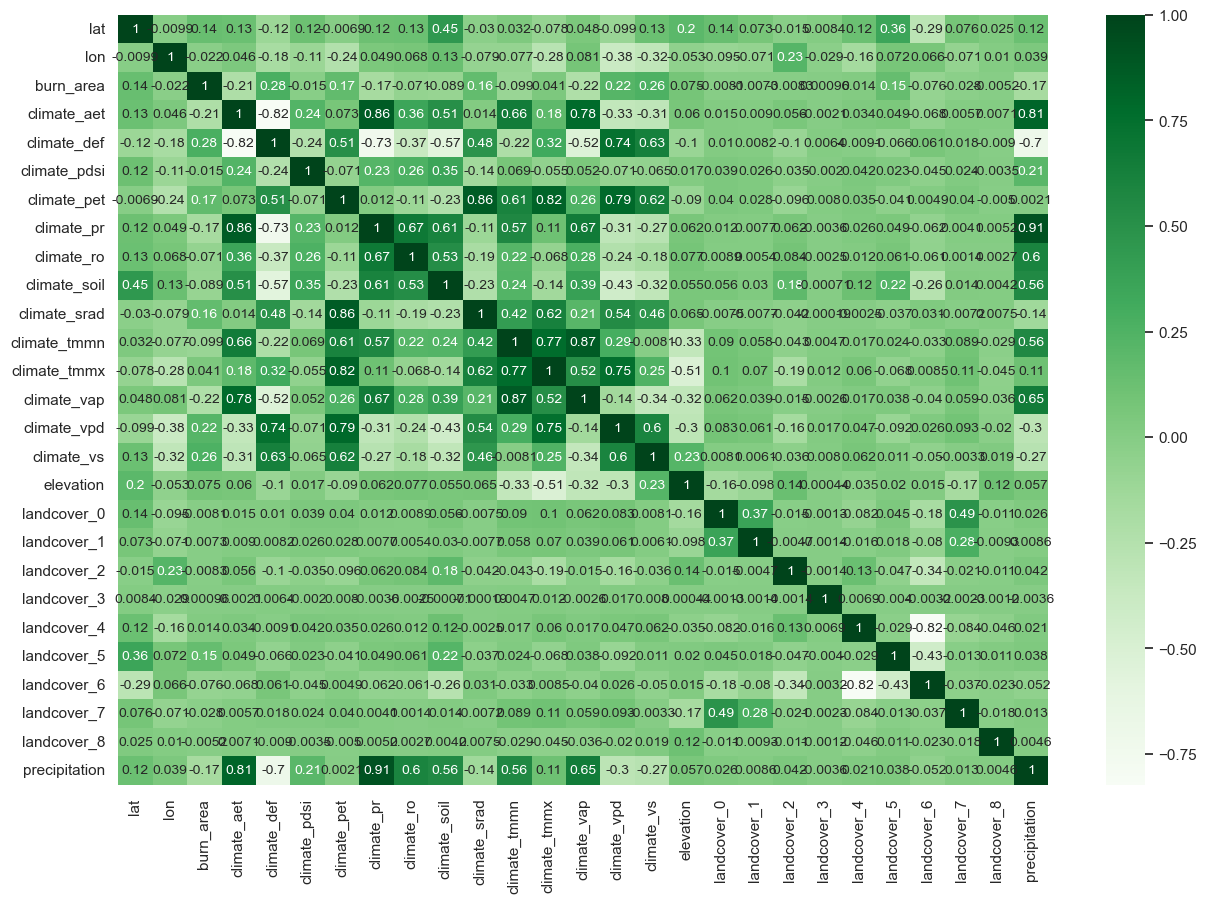

In [14]:
#Seeing their colleration before doing any analysis
sns.set(rc={'figure.figsize':(15,10)})
n_variables=['lat', 'lon', 'burn_area', 'climate_aet', 'climate_def', 'climate_pdsi',
       'climate_pet', 'climate_pr', 'climate_ro', 'climate_soil',
       'climate_srad', 'climate_tmmn', 'climate_tmmx', 'climate_vap',
       'climate_vpd', 'climate_vs', 'elevation', 'landcover_0', 'landcover_1',
       'landcover_2', 'landcover_3', 'landcover_4', 'landcover_5',
       'landcover_6', 'landcover_7', 'landcover_8', 'precipitation']
pc=numerical_dataframe[n_variables].corr(method='pearson')
cols=n_variables
ax=sns.heatmap(pc, annot=True,
               yticklabels=cols,
               xticklabels=cols,
               annot_kws={'size':10},
               cmap='Greens'
              )

# Checking for Outliers

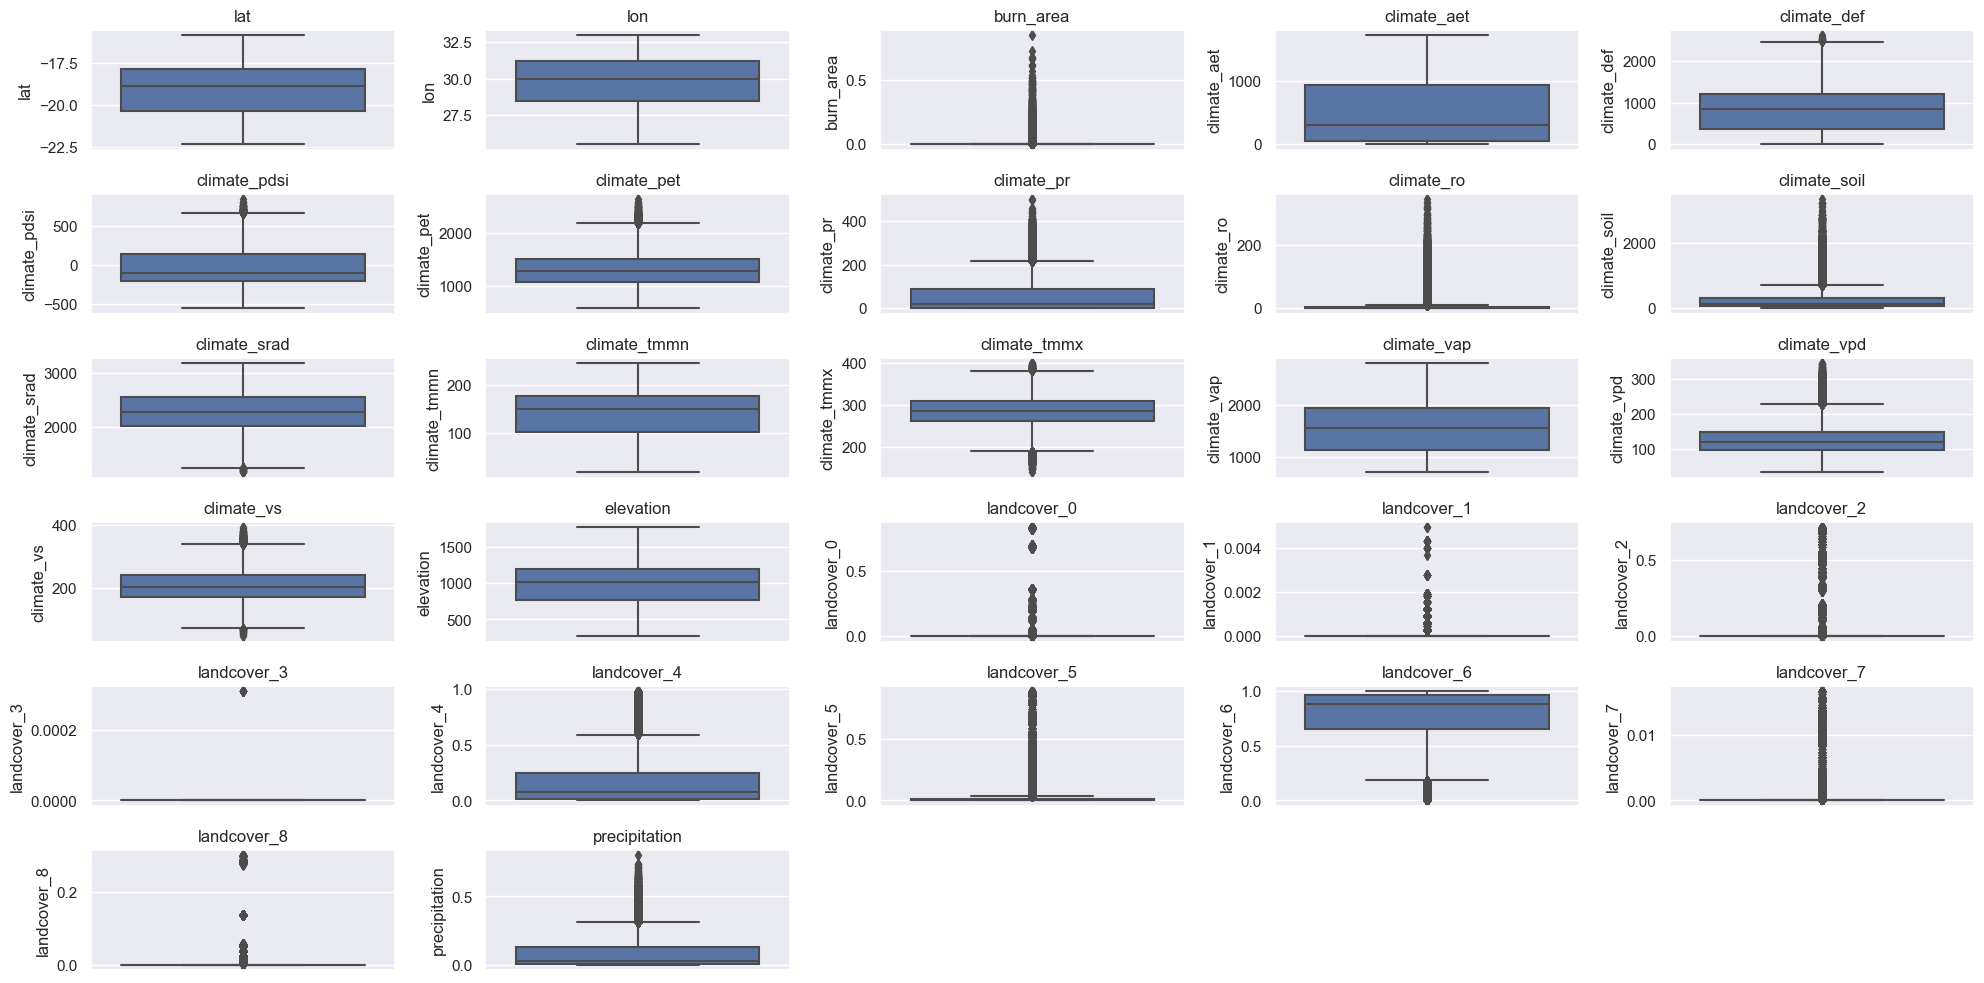

In [15]:
plt.figure(figsize=(20, 10))
for i in range (len(numerical_dataframe.columns)):
  plt.subplot(6, 5, i+1)
  sns.boxplot(y=numerical_dataframe.columns[i], data=numerical_dataframe)
  plt.title(numerical_dataframe.columns[i])
plt.tight_layout()
plt.show();

As we can see, our data has many outliers which will affect our model perfomance
1. We really need to check the amount of outliers each column has
2. check the skewness to see if it is negatively skewed or positively skewed or normally distributed , that will help us to know what to do with the data.

In [20]:
df13=numerical_dataframe.copy()

In [21]:
#checking for values which are below 25% or above 75%
df13 = df13.select_dtypes(include=['float64', 'int64'])
Q1 =df13.quantile(0.25)
Q3 = df13.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df13 < (Q1 - 1.5 * IQR)) | (df13> (Q3 + 1.5 * IQR))).sum()

# Print outliers per column
print(outliers)

lat                  0
lon                  0
burn_area        19423
climate_aet          0
climate_def         17
climate_pdsi       127
climate_pet        597
climate_pr        3451
climate_ro        5511
climate_soil     10909
climate_srad        23
climate_tmmn         0
climate_tmmx       419
climate_vap          0
climate_vpd       3096
climate_vs         260
elevation            0
landcover_0       5228
landcover_1       2196
landcover_2      14034
landcover_3         11
landcover_4       3504
landcover_5      14229
landcover_6       2436
landcover_7       7618
landcover_8      10043
precipitation     3383
dtype: int64


In [ ]:
Categorizing the outliers based on the percentace, to see the way foward

In [25]:

high_outliers = outliers[outliers > (0.10 * df13.shape[0])]
moderate_outliers = outliers[((outliers >= (0.01 * df13.shape[0])) & (outliers <= (0.10 * df13.shape[0])))]
low_outliers = outliers[outliers < (0.01 * df13.shape[0])]

print("\nHigh Percentage Outliers (>10%):")
print(high_outliers)

print("\nModerate Percentage Outliers (1-10%):")
print(moderate_outliers)

print("\nLow Percentage Outliers (<1%):")
print(low_outliers)


High Percentage Outliers (>10%):
burn_area       19423
climate_soil    10909
landcover_2     14034
landcover_5     14229
landcover_8     10043
dtype: int64

Moderate Percentage Outliers (1-10%):
climate_pr       3451
climate_ro       5511
climate_vpd      3096
landcover_0      5228
landcover_1      2196
landcover_4      3504
landcover_6      2436
landcover_7      7618
precipitation    3383
dtype: int64

Low Percentage Outliers (<1%):
lat               0
lon               0
climate_aet       0
climate_def      17
climate_pdsi    127
climate_pet     597
climate_srad     23
climate_tmmn      0
climate_tmmx    419
climate_vap       0
climate_vs      260
elevation         0
landcover_3      11
dtype: int64


As wecan see, in our data those outliers which are less that 1% we can drop them unless otherwise

In [26]:
low_percentage_outliers = ['climate_pdsi','climate_pet', 'climate_srad','climate_tmmx','elevation', 'climate_vs']

for col in low_percentage_outliers:
    Q1 = df13[col].quantile(0.25)
    Q3 = df13[col].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df13[col] >= Q1 - 1.5 * IQR) & (df13[col] <= Q3 + 1.5 * IQR)
    df13 = df13.loc[filter]

For moderate outliers, we can use capping and flooring to sort them out

In [27]:
moderate_percentage_outliers = ['climate_vpd', 'precipitation', 'landcover_4', 'landcover_6']


def cap_floor_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df


for col in moderate_percentage_outliers:
    df1 = cap_floor_outliers(df13, col)


Checking again for the remaining outliers 

In [28]:

df13 = df13.select_dtypes(include=['float64', 'int64'])
Q1 =df13.quantile(0.25)
Q3 = df13.quantile(0.75)
IQR = Q3 - Q1


outliers = ((df13 < (Q1 - 1.5 * IQR)) | (df13> (Q3 + 1.5 * IQR))).sum()


print(outliers)


lat                  0
lon                  0
burn_area        18827
climate_aet          0
climate_def          0
climate_pdsi        11
climate_pet         93
climate_pr        3337
climate_ro        5487
climate_soil     10785
climate_srad         1
climate_tmmn         0
climate_tmmx         0
climate_vap          0
climate_vpd          0
climate_vs           0
elevation            0
landcover_0       5166
landcover_1       2135
landcover_2      13560
landcover_3         10
landcover_4          0
landcover_5      13975
landcover_6          0
landcover_7       7516
landcover_8       9911
precipitation        0
dtype: int64


As we can see, there are other outliers remaining. but one would wonder why didnt we do anything with them.The truth is 
1. When we did describe() function it was clearly shown that it has wide deviation which is likely to be more outliers
2. Our target varibale has 76% of 0s which implies that either way, it will still have outlieries
Now the question is: Should we drop all the outliers from that target variable?
    
We thought of not dropping them since it will remove important information.
On top of that, not all outliers are bad, some are valid outliers
Example: Given that there are three basketball prayers, eventhough there are all tall but it could happen tha there is someone who is abit short. Does that make him not qualified to be in a team?
    The simple answer is No. So taking from that view, we thought it wise to leave them

Checking for Skewness of he data

In [22]:
def calculate_skewness(df):
    
    skewness = df.skew()
    
    for col in skewness.index:
        print(f"Column '{col}': Skewness = {skewness[col]:.3f}")
        
        if skewness[col] > 0:
            print(f"  -> Positive skew (Right skew)")
        elif skewness[col] < 0:
            print(f"  -> Negative skew (Left skew)")
        else:
            print(f"  -> Symmetric distribution")


calculate_skewness(df13)

Column 'lat': Skewness = -0.055
  -> Negative skew (Left skew)
Column 'lon': Skewness = -0.290
  -> Negative skew (Left skew)
Column 'burn_area': Skewness = 7.676
  -> Positive skew (Right skew)
Column 'climate_aet': Skewness = 0.583
  -> Positive skew (Right skew)
Column 'climate_def': Skewness = 0.089
  -> Positive skew (Right skew)
Column 'climate_pdsi': Skewness = 0.661
  -> Positive skew (Right skew)
Column 'climate_pet': Skewness = 0.417
  -> Positive skew (Right skew)
Column 'climate_pr': Skewness = 1.696
  -> Positive skew (Right skew)
Column 'climate_ro': Skewness = 6.601
  -> Positive skew (Right skew)
Column 'climate_soil': Skewness = 2.296
  -> Positive skew (Right skew)
Column 'climate_srad': Skewness = 0.022
  -> Positive skew (Right skew)
Column 'climate_tmmn': Skewness = -0.311
  -> Negative skew (Left skew)
Column 'climate_tmmx': Skewness = -0.225
  -> Negative skew (Left skew)
Column 'climate_vap': Skewness = 0.148
  -> Positive skew (Right skew)
Column 'climate_vpd':

Checking if we have some columns which has NAN Skewness

Investigating column: lat
 - No issues detected for skewness calculation.


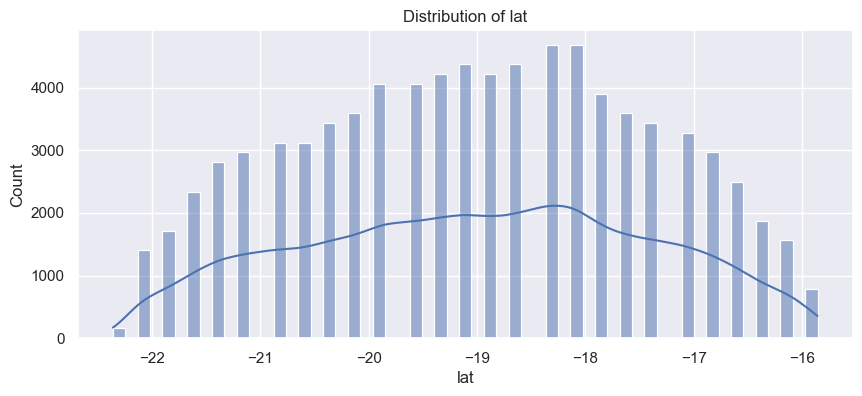

Investigating column: lon
 - No issues detected for skewness calculation.


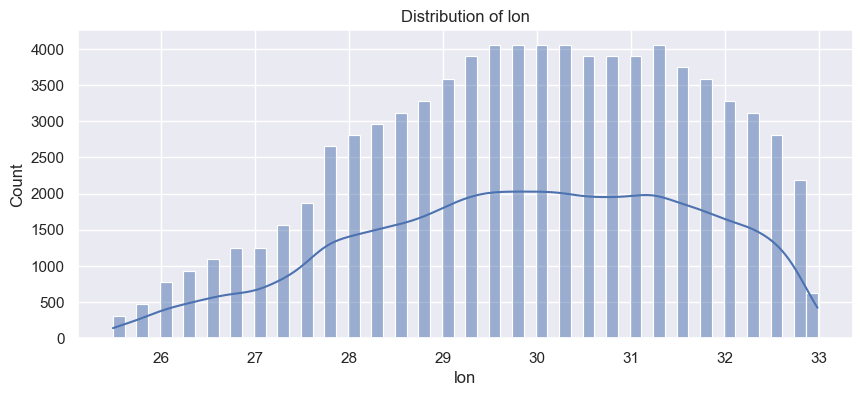

Investigating column: burn_area
 - No issues detected for skewness calculation.


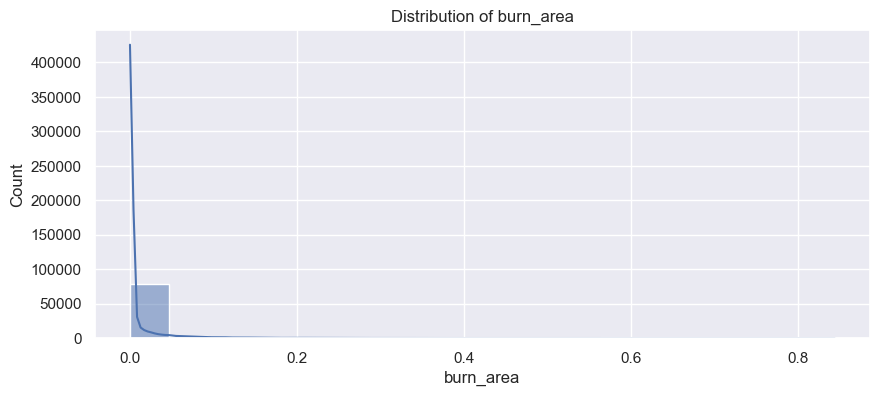

Investigating column: climate_aet
 - No issues detected for skewness calculation.


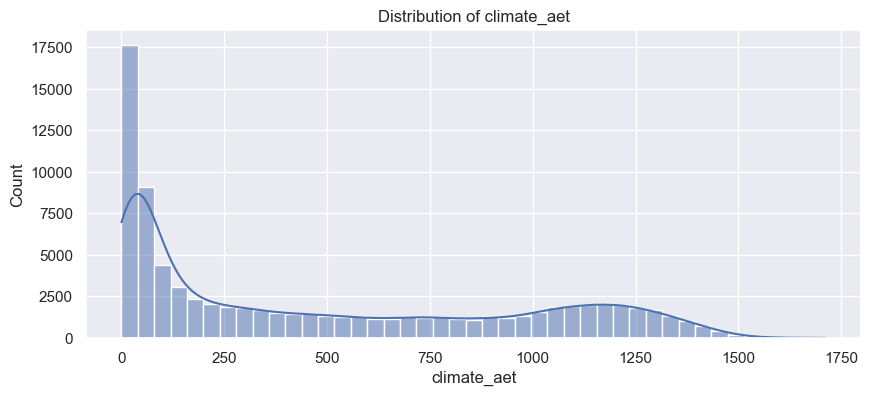

Investigating column: climate_def
 - No issues detected for skewness calculation.


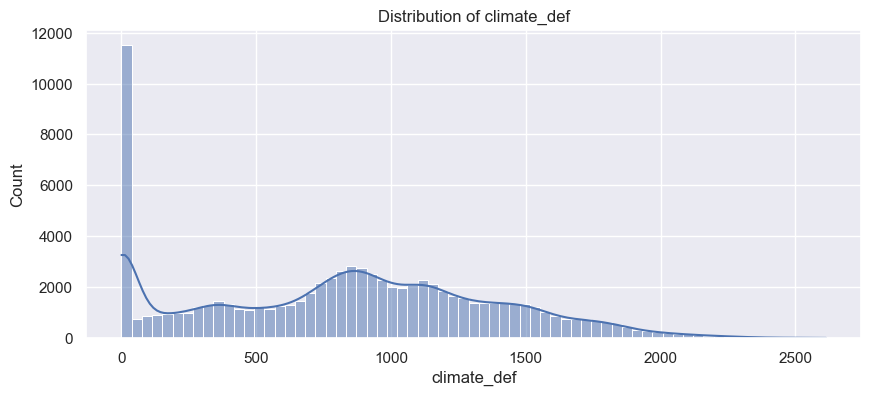

Investigating column: climate_pdsi
 - No issues detected for skewness calculation.


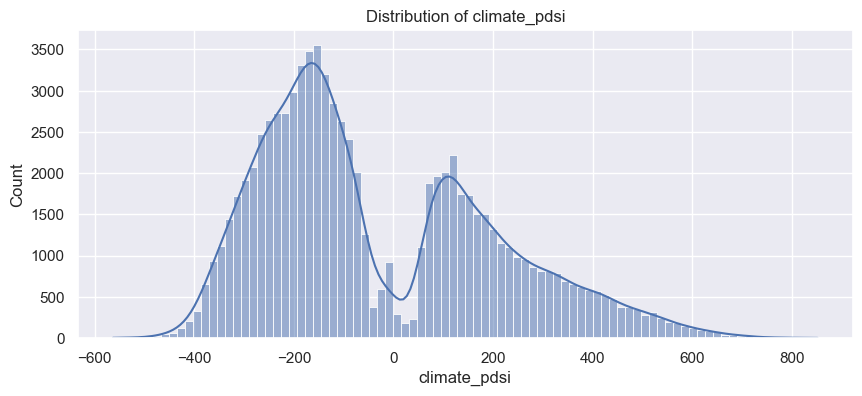

Investigating column: climate_pet
 - No issues detected for skewness calculation.


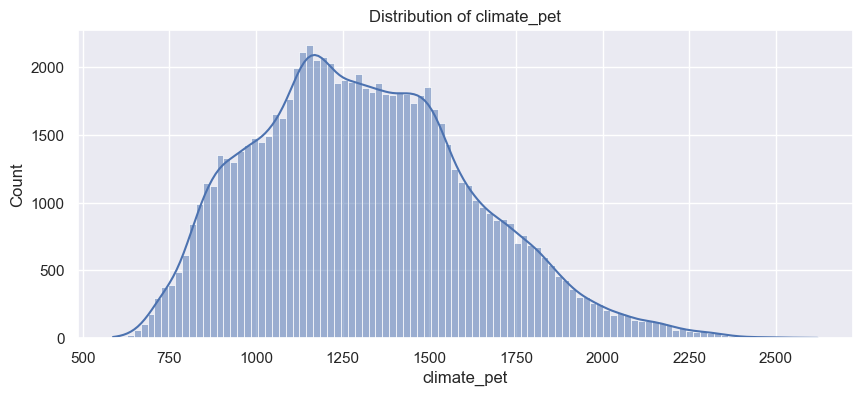

Investigating column: climate_pr
 - No issues detected for skewness calculation.


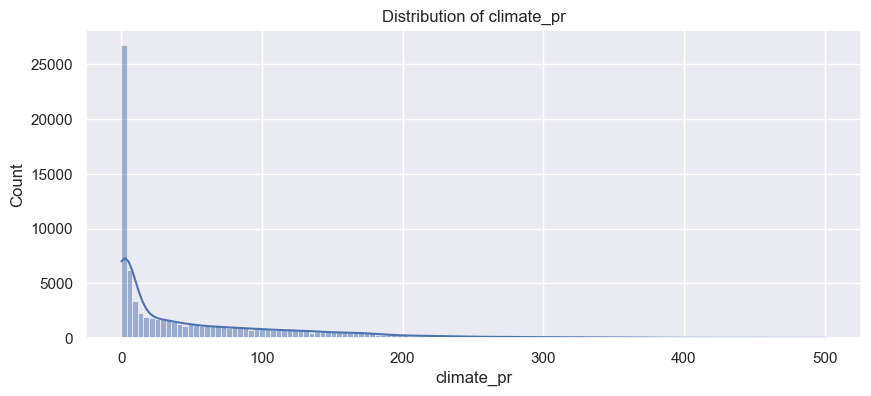

Investigating column: climate_ro
 - No issues detected for skewness calculation.


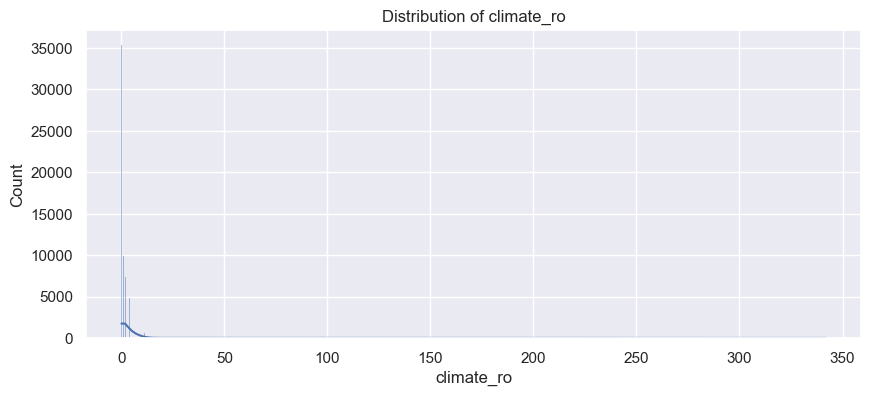

Investigating column: climate_soil
 - No issues detected for skewness calculation.


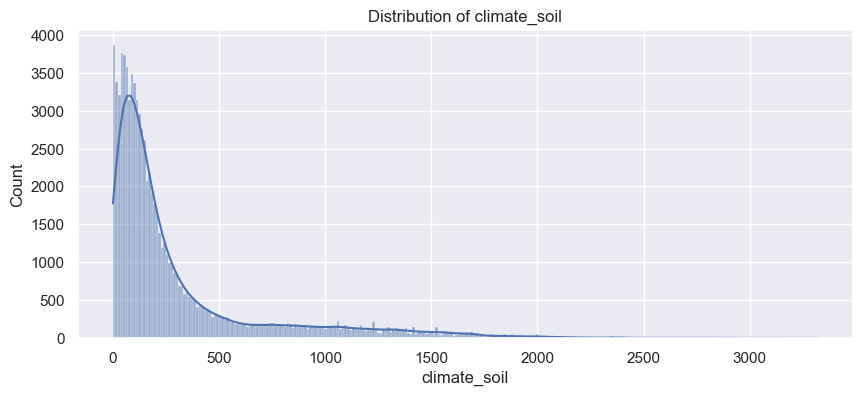

Investigating column: climate_srad
 - No issues detected for skewness calculation.


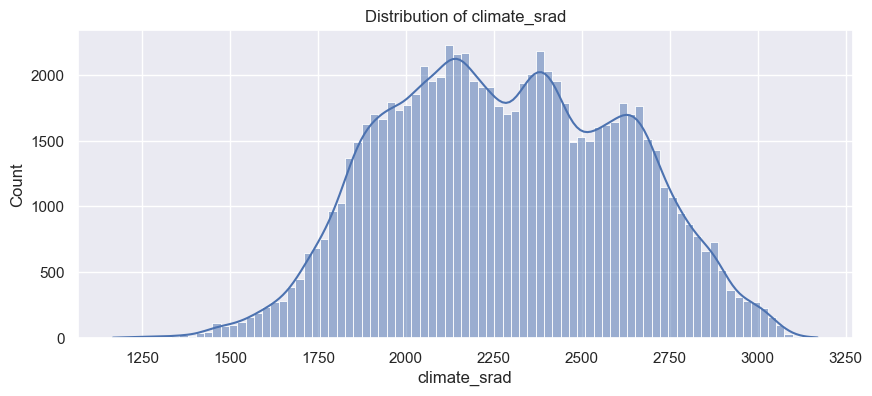

Investigating column: climate_tmmn
 - No issues detected for skewness calculation.


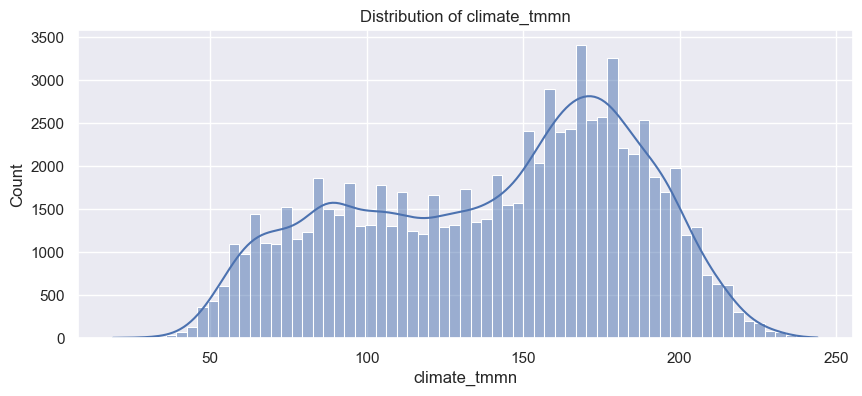

Investigating column: climate_tmmx
 - No issues detected for skewness calculation.


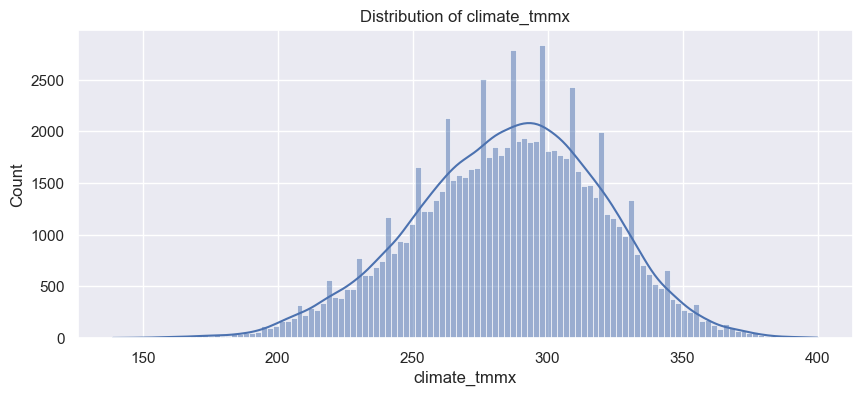

Investigating column: climate_vap
 - No issues detected for skewness calculation.


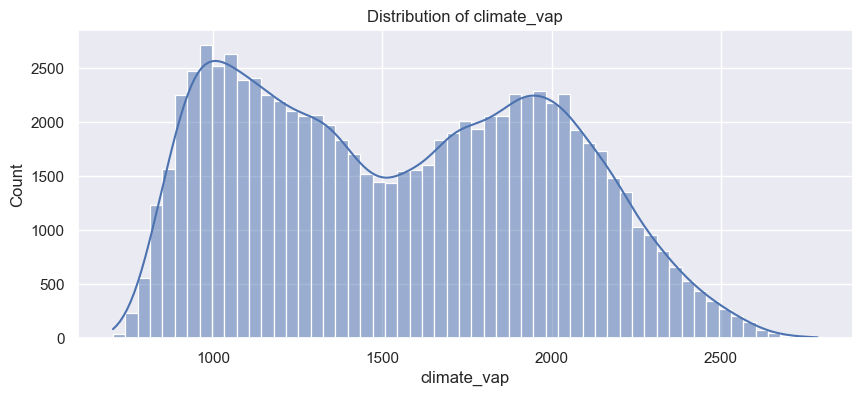

Investigating column: climate_vpd
 - No issues detected for skewness calculation.


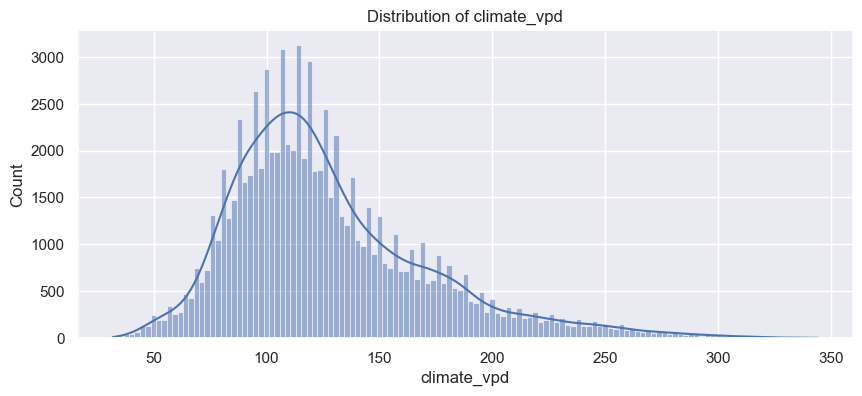

Investigating column: climate_vs
 - No issues detected for skewness calculation.


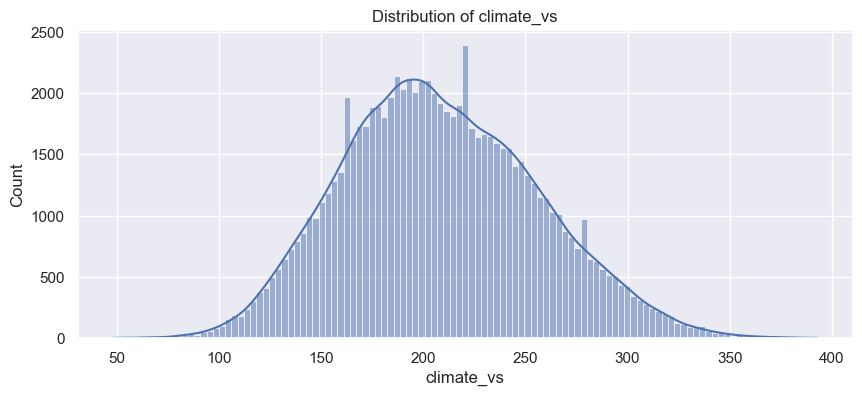

Investigating column: elevation
 - No issues detected for skewness calculation.


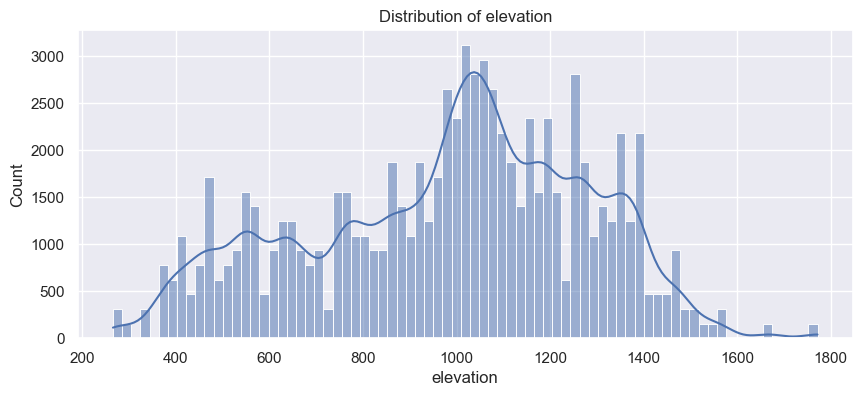

Investigating column: landcover_0
 - No issues detected for skewness calculation.


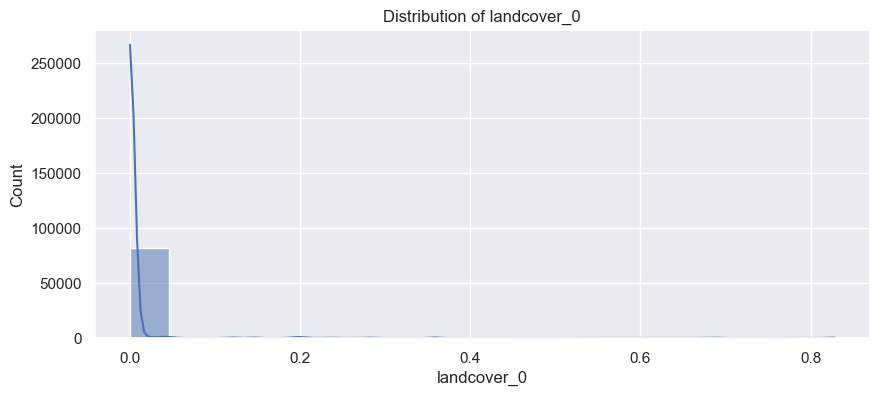

Investigating column: landcover_1
 - No issues detected for skewness calculation.


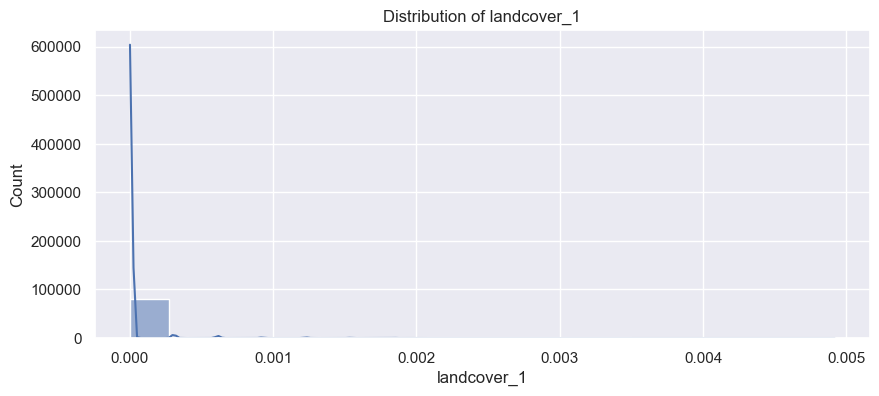

Investigating column: landcover_2
 - No issues detected for skewness calculation.


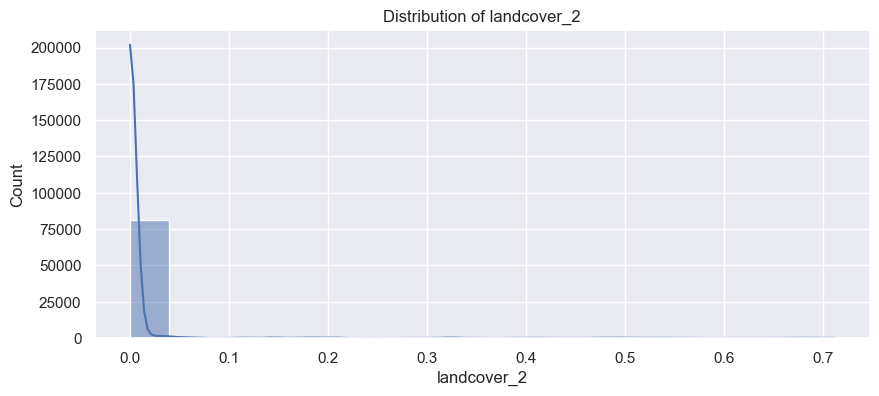

Investigating column: landcover_3
 - No issues detected for skewness calculation.


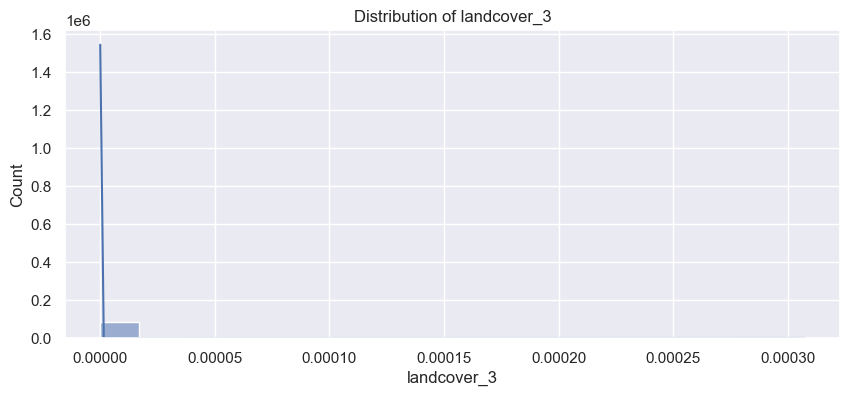

Investigating column: landcover_4
 - No issues detected for skewness calculation.


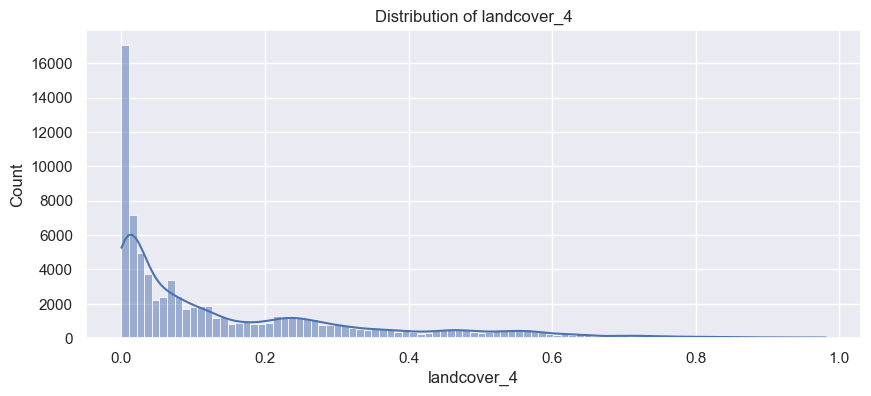

Investigating column: landcover_5
 - No issues detected for skewness calculation.


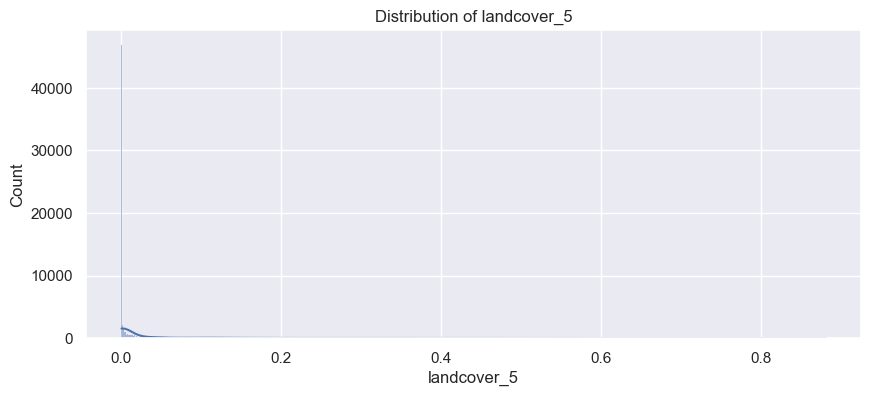

Investigating column: landcover_6
 - No issues detected for skewness calculation.


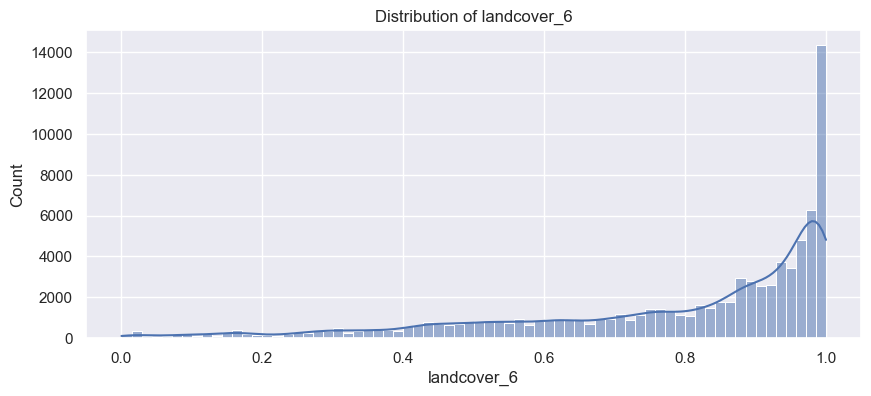

Investigating column: landcover_7
 - No issues detected for skewness calculation.


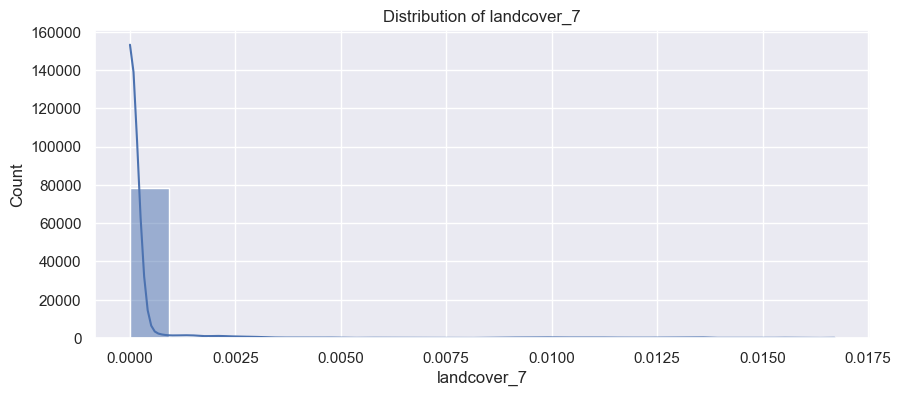

Investigating column: landcover_8
 - No issues detected for skewness calculation.


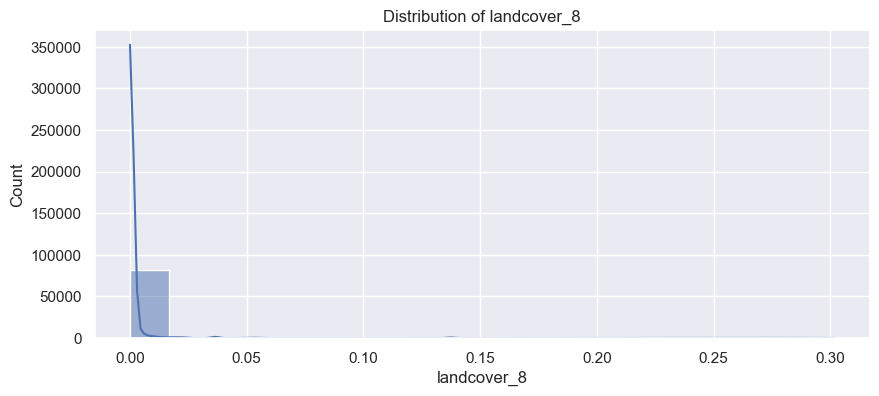

Investigating column: precipitation
 - No issues detected for skewness calculation.


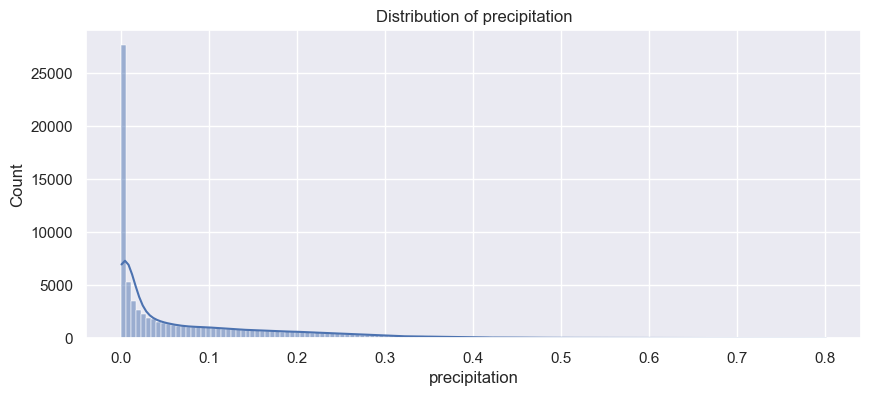

In [23]:
def investigate_nan_skewness(df):
    for col in df.columns:
        print(f"Investigating column: {col}")
        
        if df[col].isna().all():
            print(f" - Contains only NaN values.")
            continue
            
        if df[col].nunique() == 1:
            print(f" - Contains only one unique value: {df[col].unique()[0]}")
            continue
            
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f" - Is not numeric.")
            continue
        
        if df[col].var() == 0:
            print(f" - Has zero variance.")
            continue
        
        if np.isinf(df[col]).any():
            print(f" - Contains infinite values.")
            continue
        
        print(f" - No issues detected for skewness calculation.")
        
        # Visual inspection
        plt.figure(figsize=(10, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()


investigate_nan_skewness(df13)

# Checking tthe correlation between the features and a target variables

Plotting for a scatterplot to check the relationship between the target and the features

In [32]:
df1.columns

Index(['lat', 'lon', 'burn_area', 'climate_aet', 'climate_def', 'climate_pdsi',
       'climate_pet', 'climate_pr', 'climate_ro', 'climate_soil',
       'climate_srad', 'climate_tmmn', 'climate_tmmx', 'climate_vap',
       'climate_vpd', 'climate_vs', 'elevation', 'landcover_0', 'landcover_1',
       'landcover_2', 'landcover_3', 'landcover_4', 'landcover_5',
       'landcover_6', 'landcover_7', 'landcover_8', 'precipitation'],
      dtype='object')

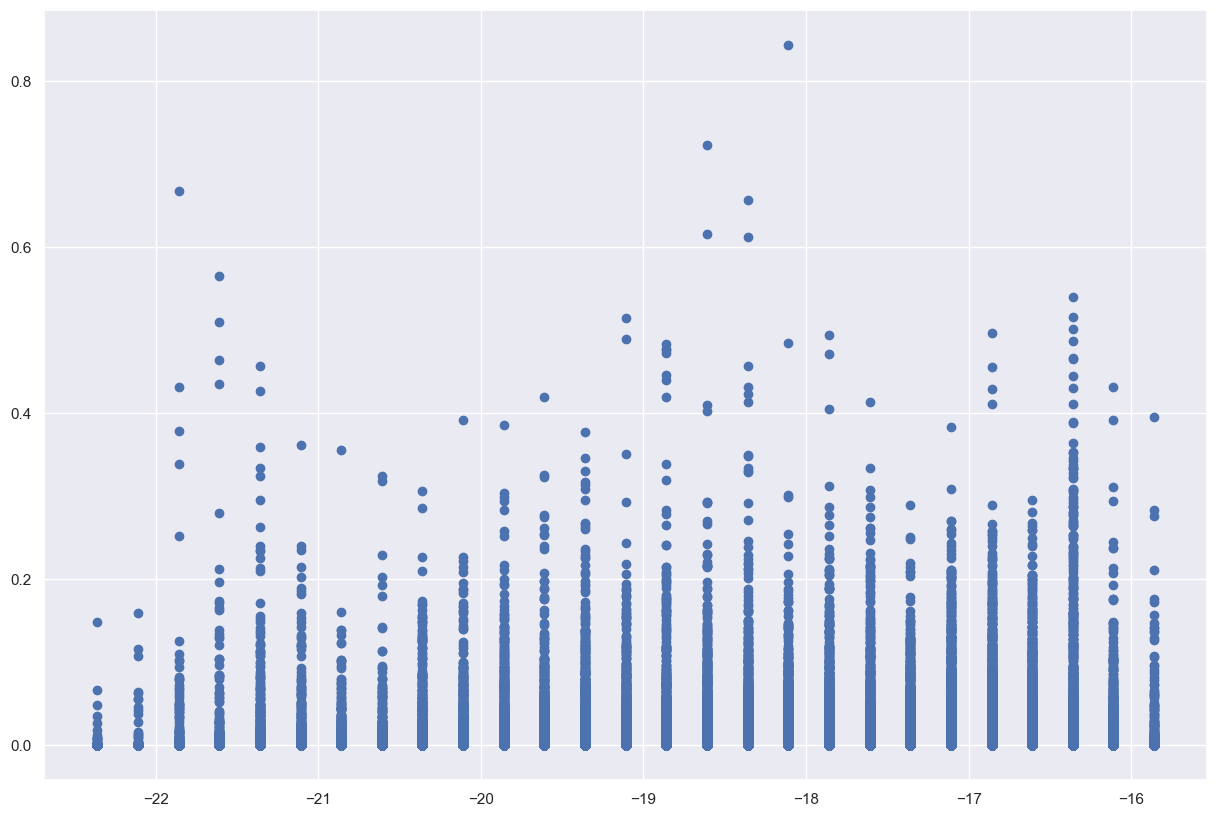

In [33]:
plt.scatter(x=df1['lat'], y=df1['burn_area']);

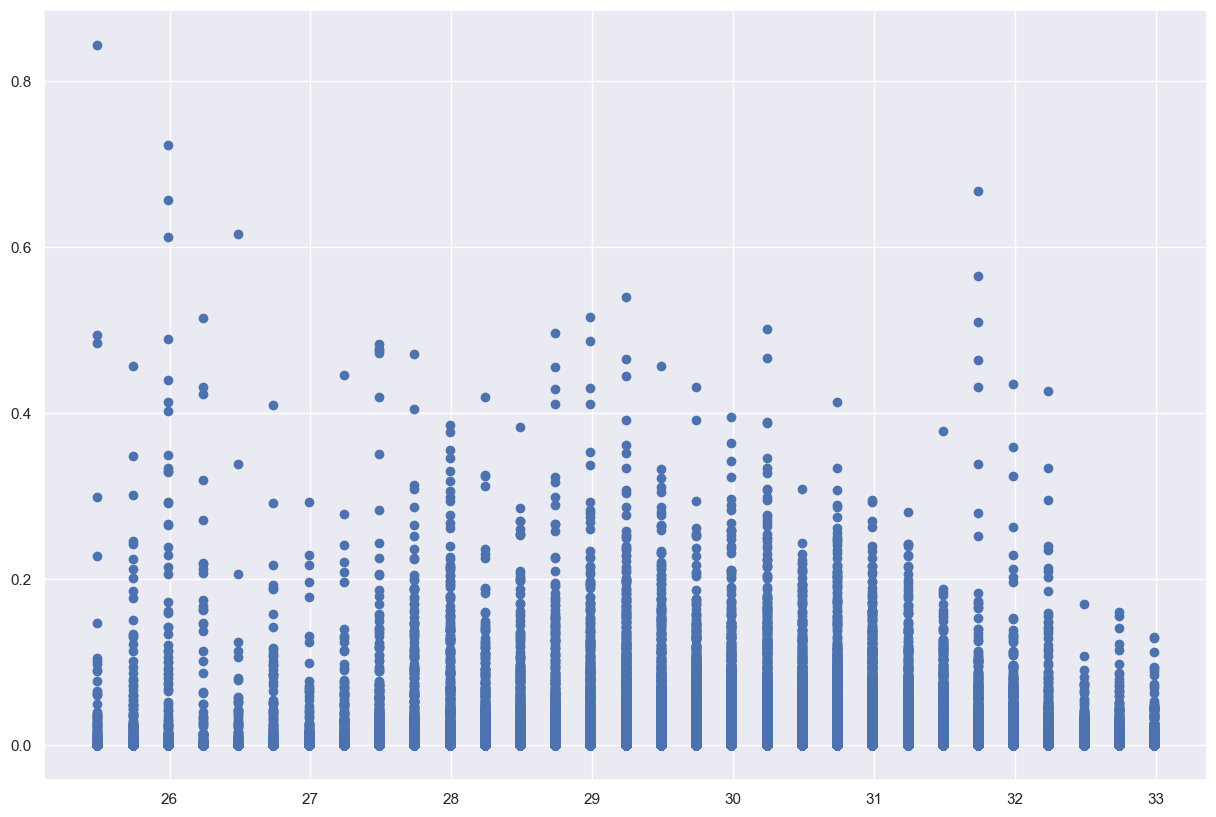

In [34]:
plt.scatter(x=df1['lon'], y=df1['burn_area']);

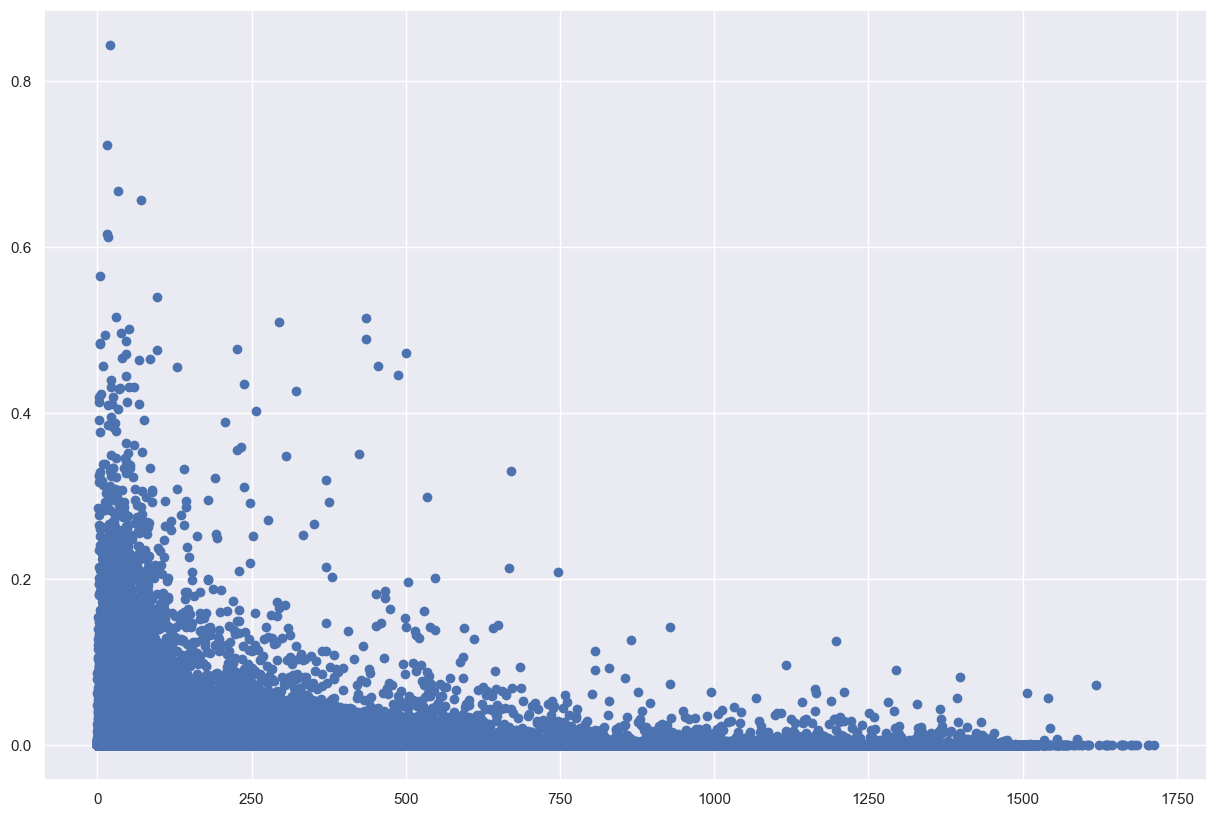

In [35]:
plt.scatter(x=df1['climate_aet'], y=df1['burn_area']);

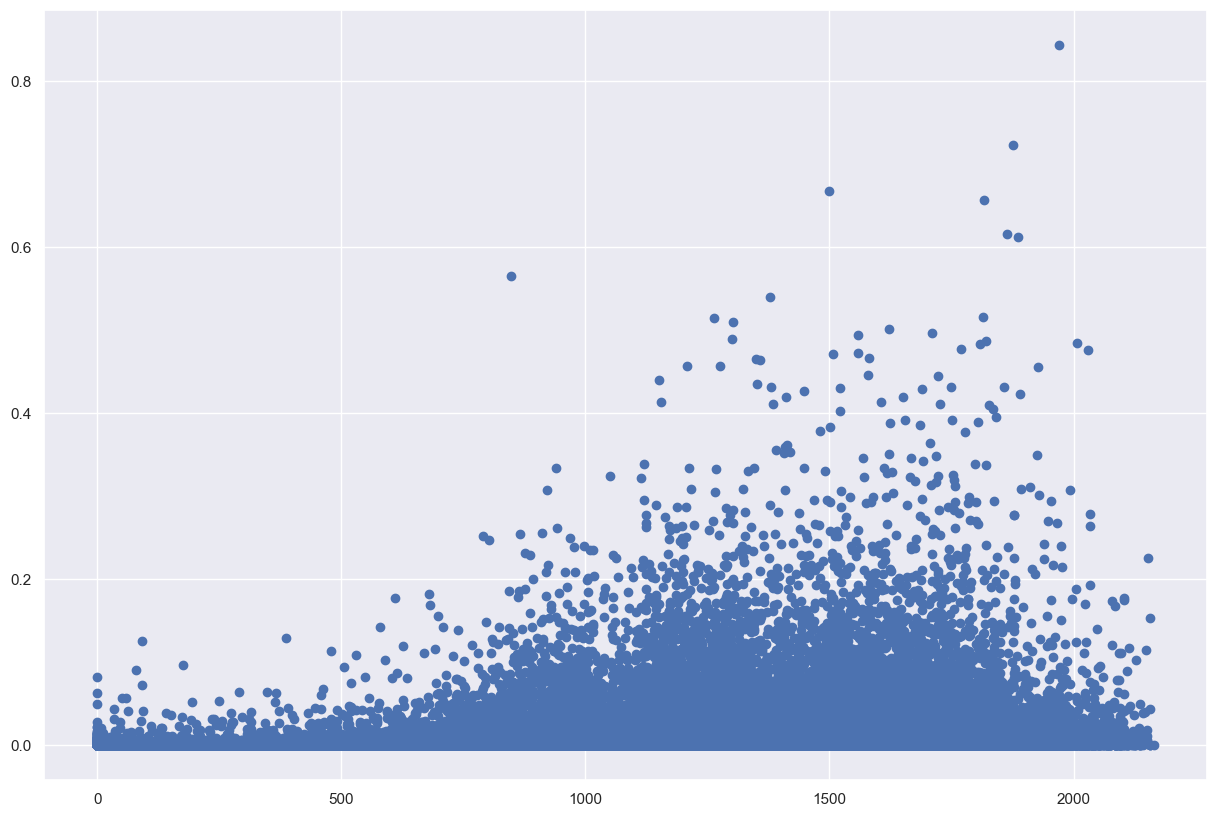

In [36]:
plt.scatter(x=df1['climate_def'], y=df1['burn_area']);

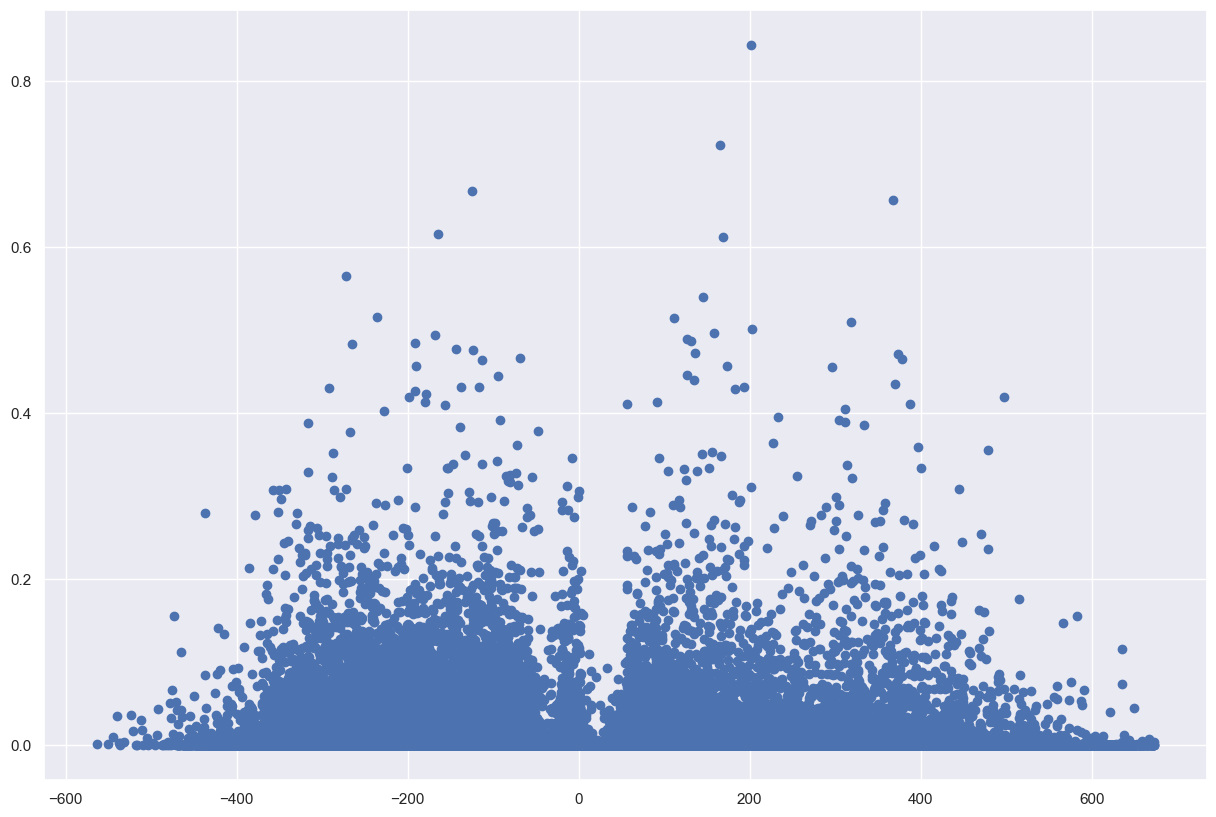

In [37]:
plt.scatter(x=df1['climate_pdsi'], y=df1['burn_area']);

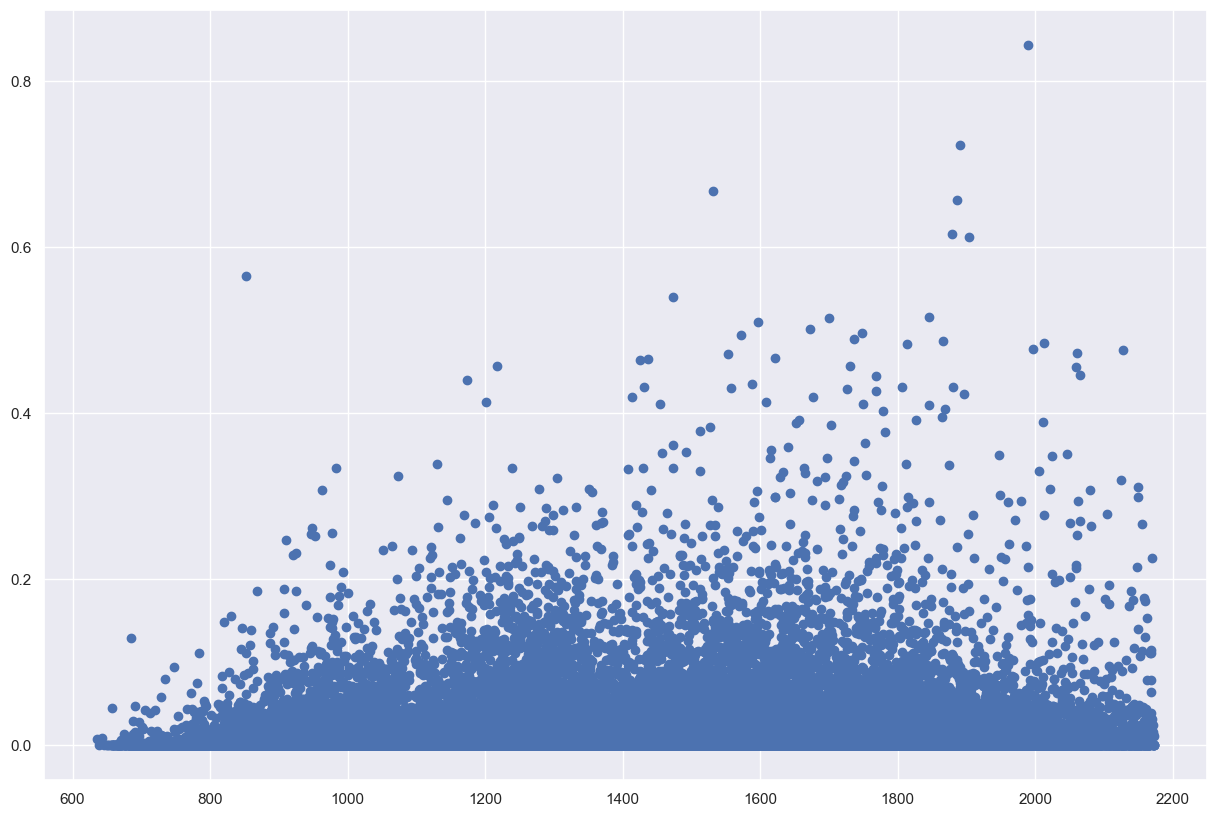

In [38]:
plt.scatter(x=df1['climate_pet'], y=df1['burn_area']);

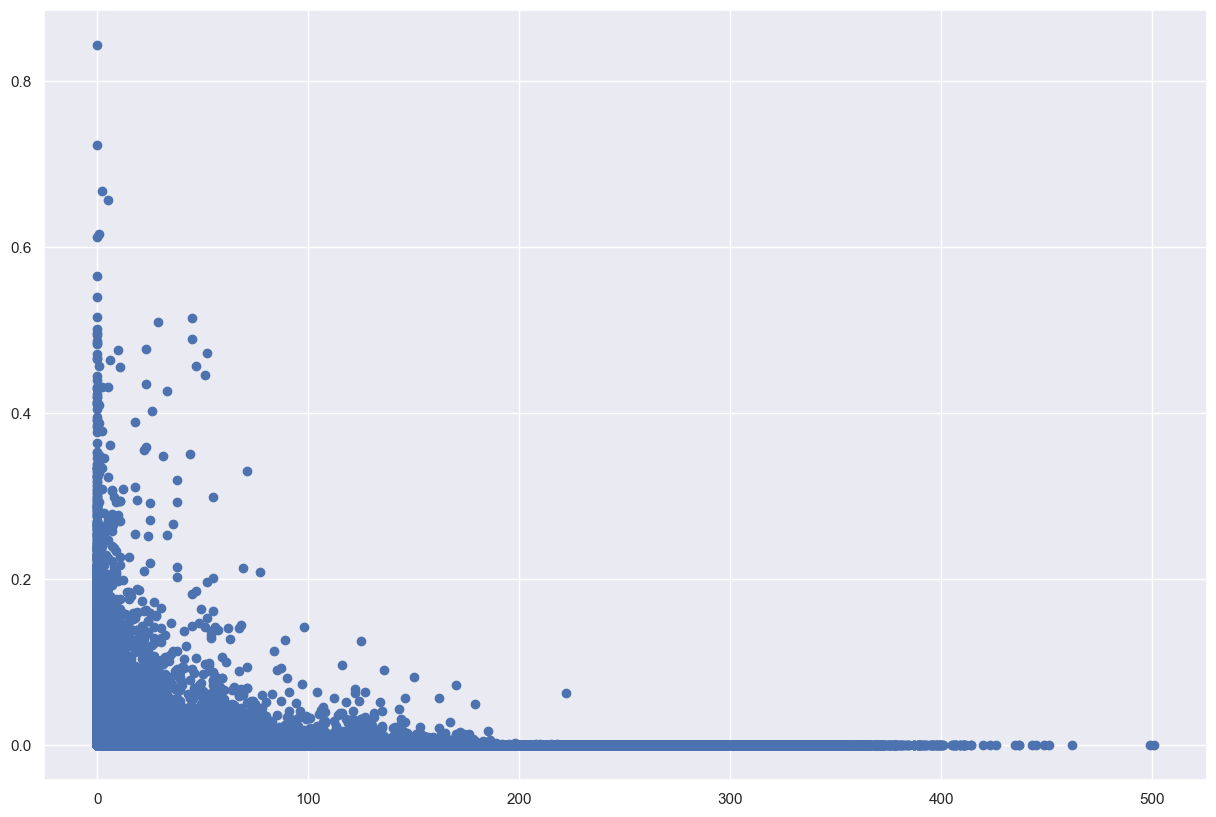

In [39]:
plt.scatter(x=df1['climate_pr'], y=df1['burn_area']);

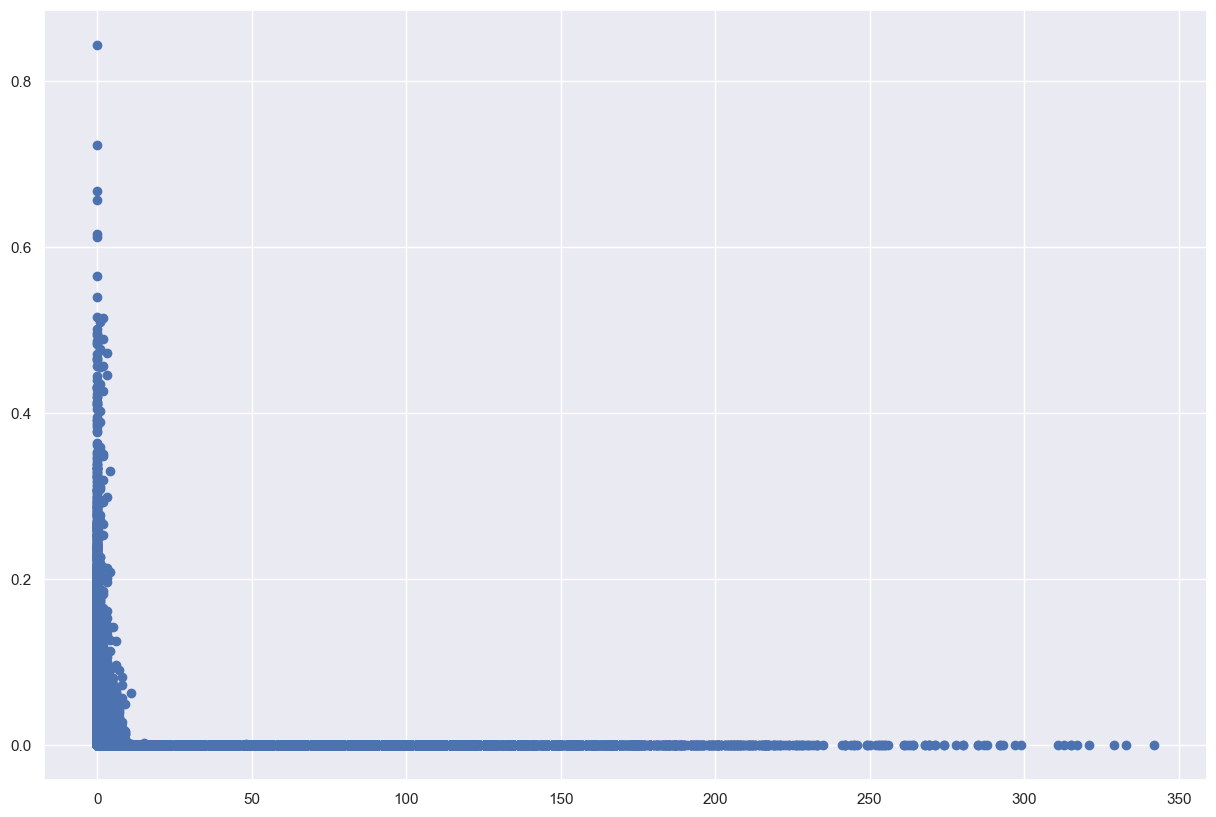

In [40]:
plt.scatter(x=df1['climate_ro'], y=df1['burn_area']);

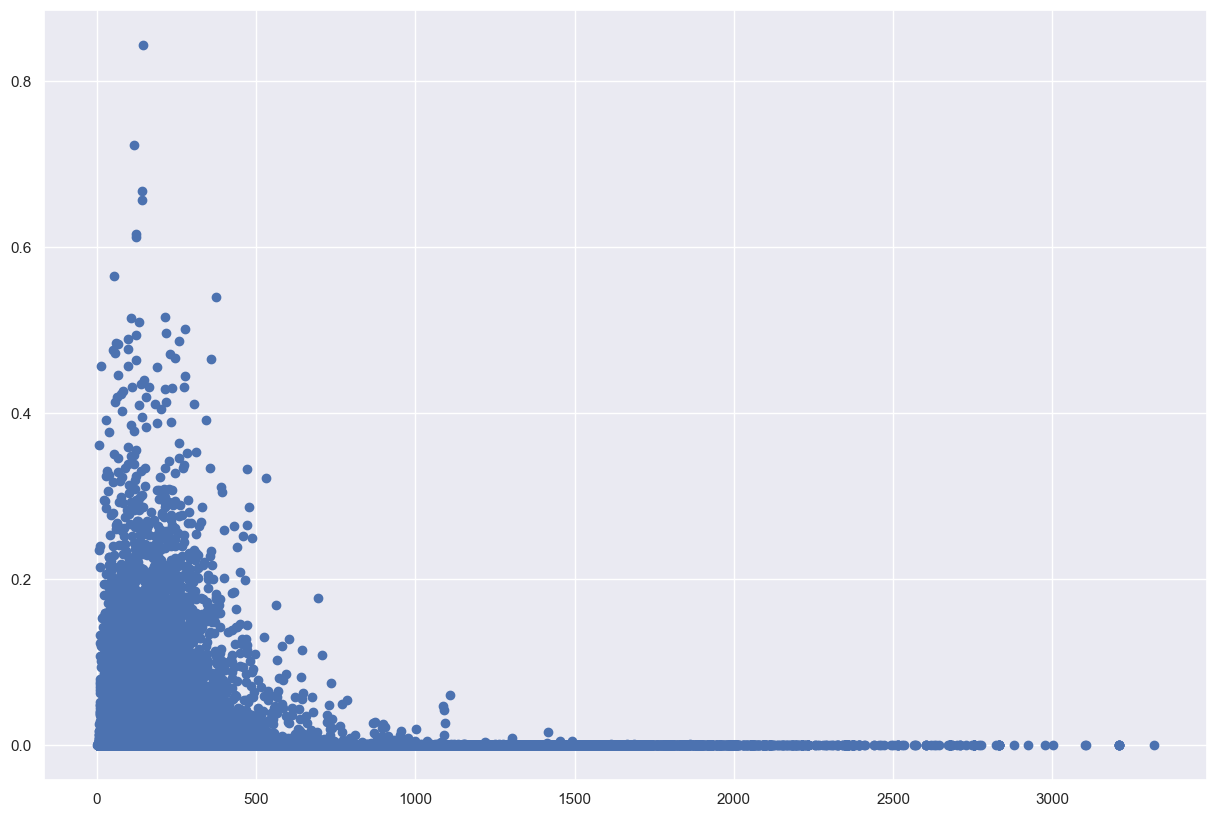

In [41]:
plt.scatter(x=df1['climate_soil'], y=df1['burn_area']);

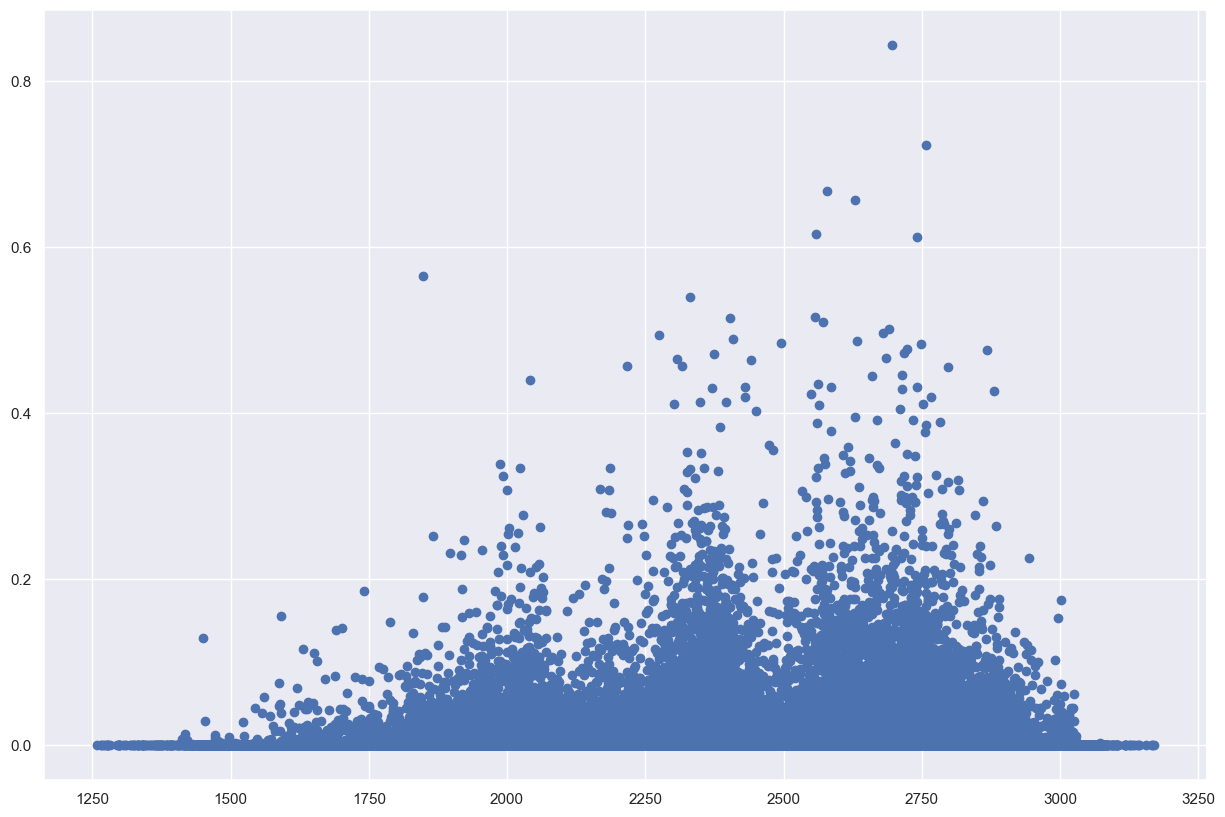

In [42]:
plt.scatter(x=df1['climate_srad'], y=df1['burn_area']);

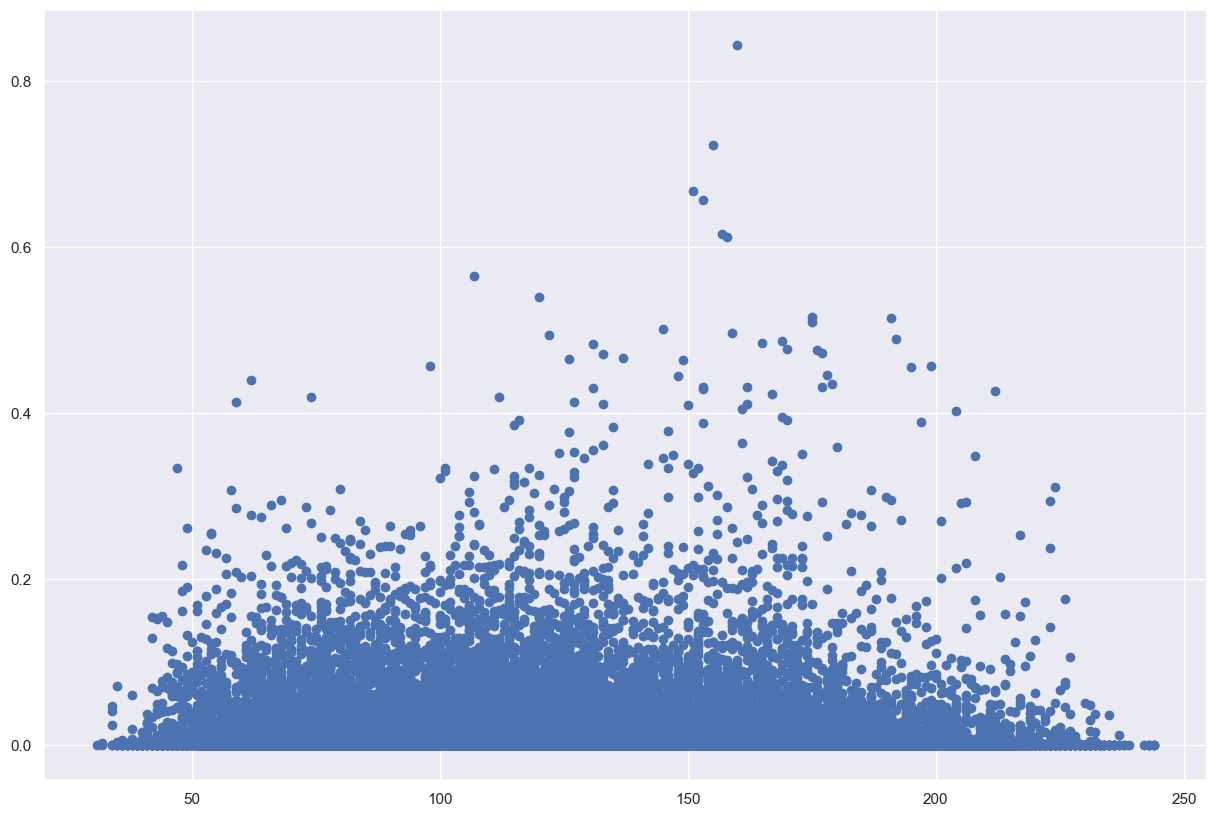

In [43]:
plt.scatter(x=df1['climate_tmmn'], y=df1['burn_area']);

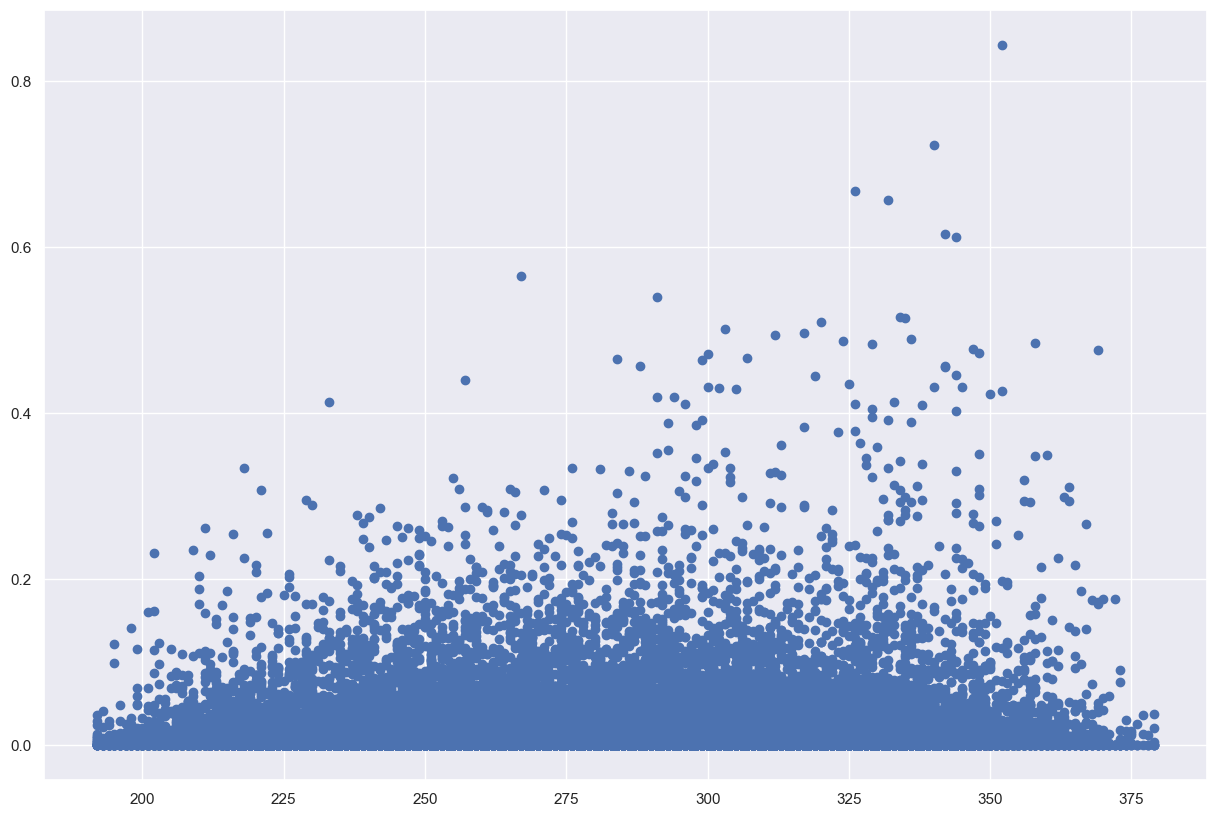

In [44]:
plt.scatter(x=df1['climate_tmmx'], y=df1['burn_area']);

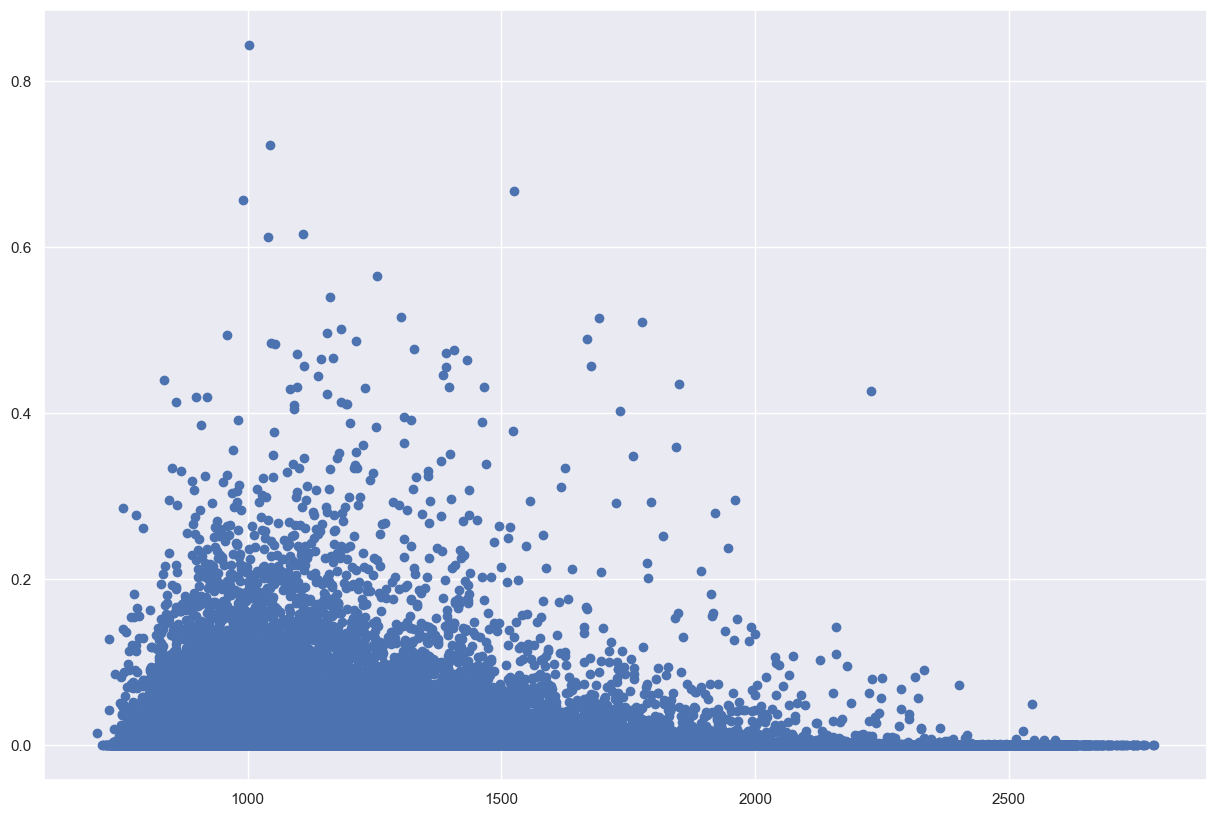

In [45]:
plt.scatter(x=df1['climate_vap'], y=df1['burn_area']);

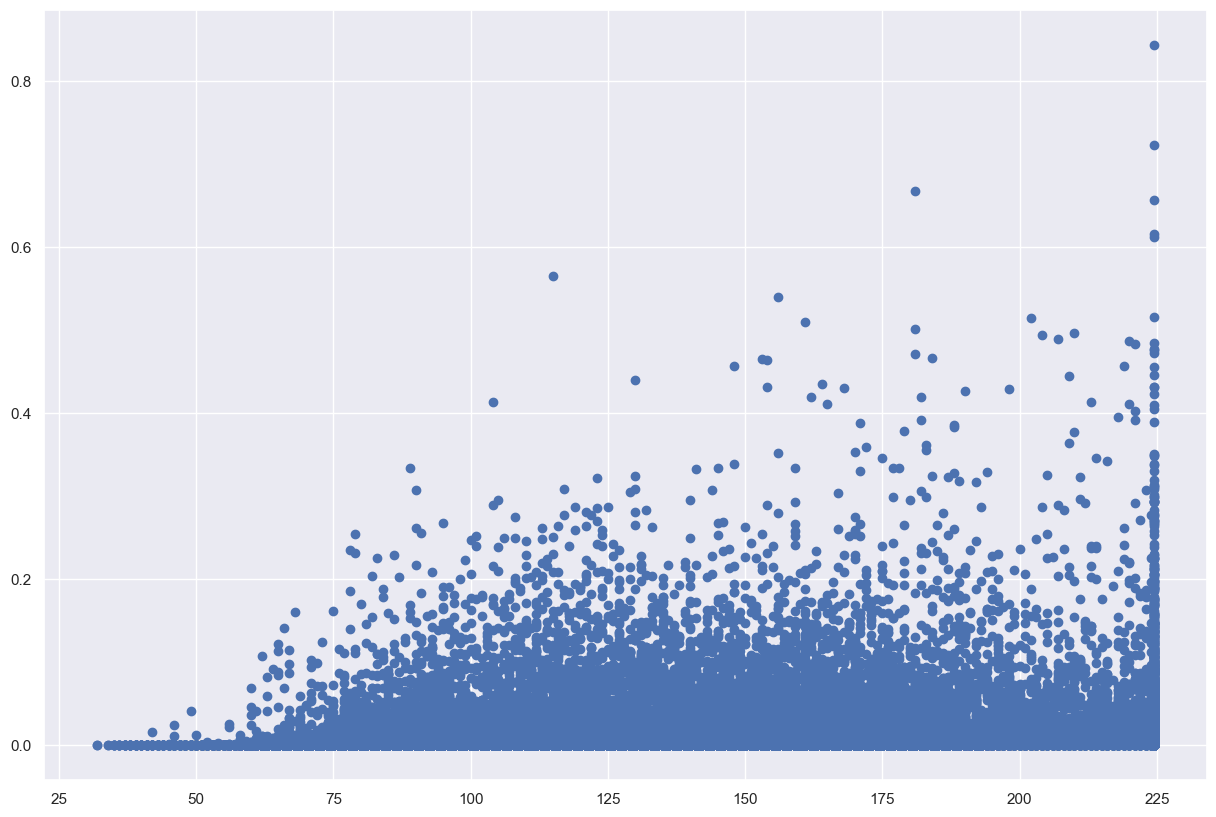

In [46]:
plt.scatter(x=df1['climate_vpd'], y=df1['burn_area']);

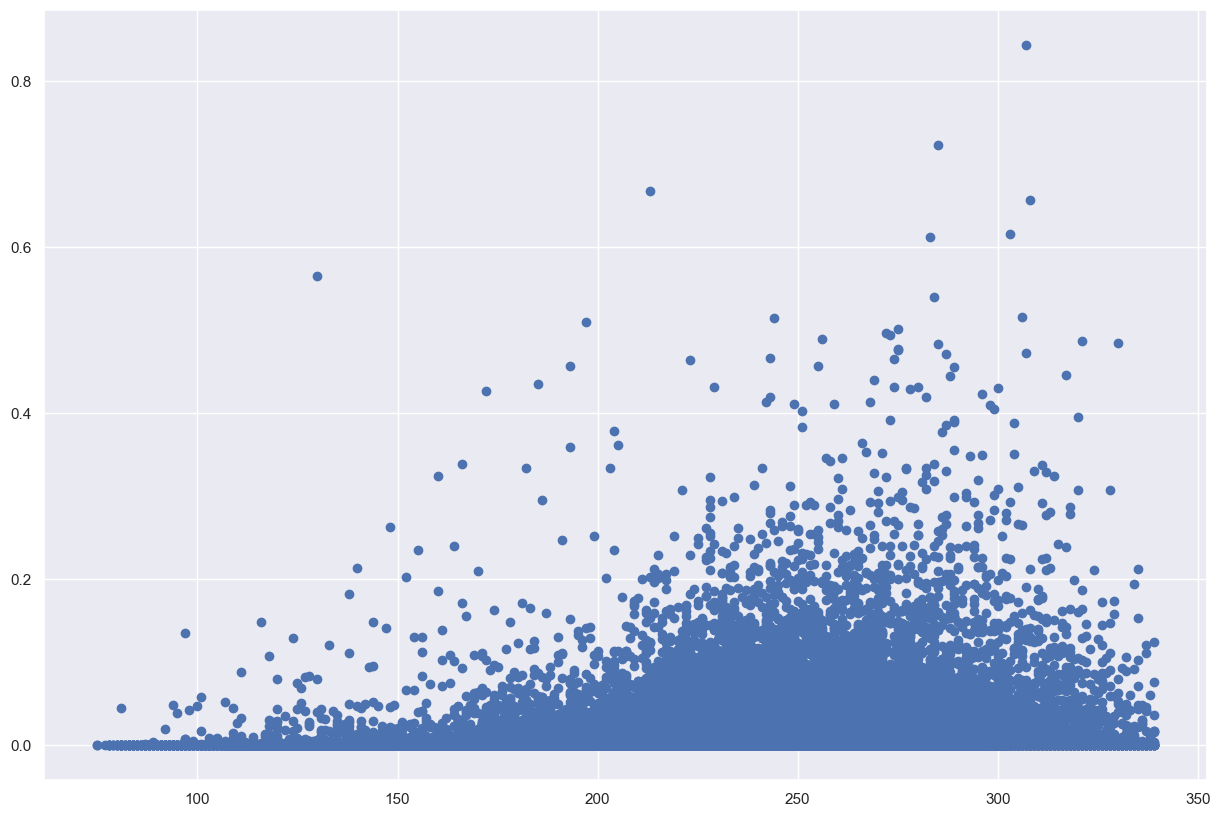

In [47]:
plt.scatter(x=df1['climate_vs'], y=df1['burn_area']);

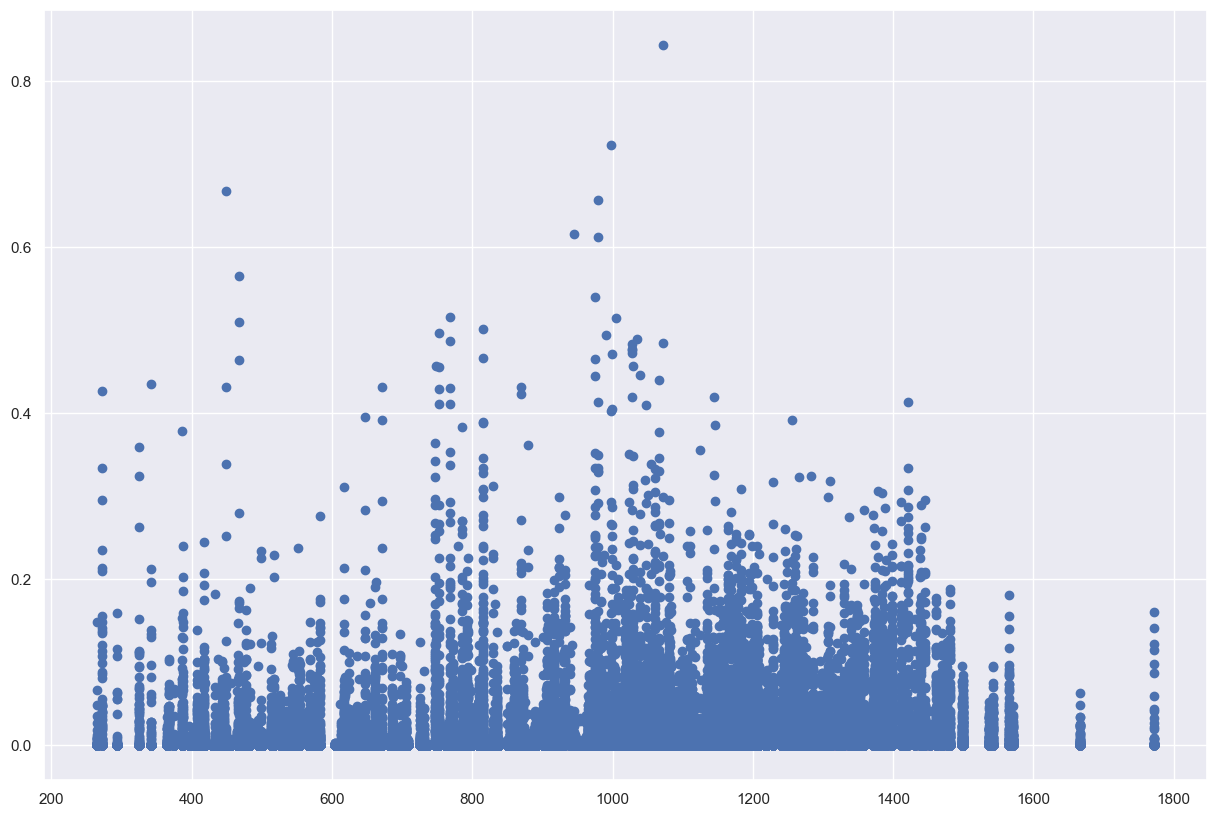

In [48]:
plt.scatter(x=df1['elevation'], y=df1['burn_area']);

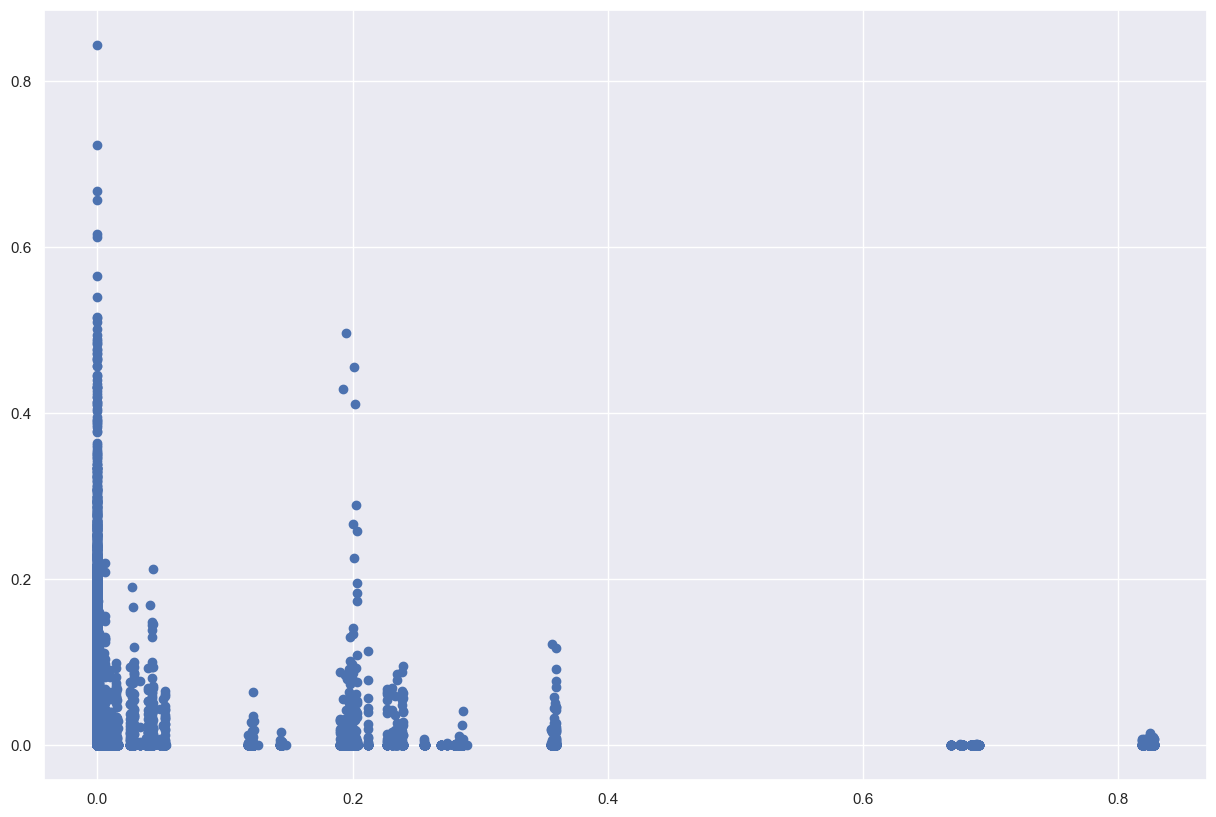

In [49]:
plt.scatter(x=df1['landcover_0'], y=df1['burn_area']);

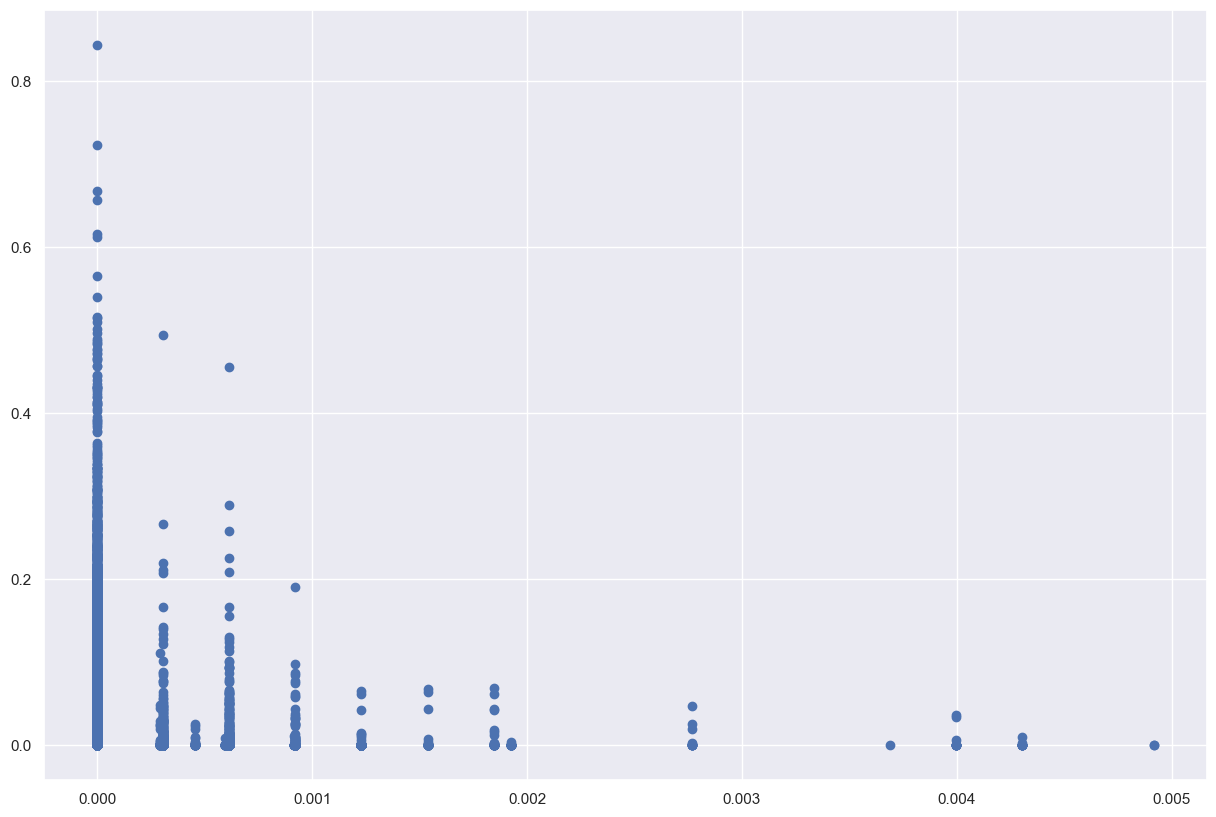

In [50]:
plt.scatter(x=df1['landcover_1'], y=df1['burn_area']);

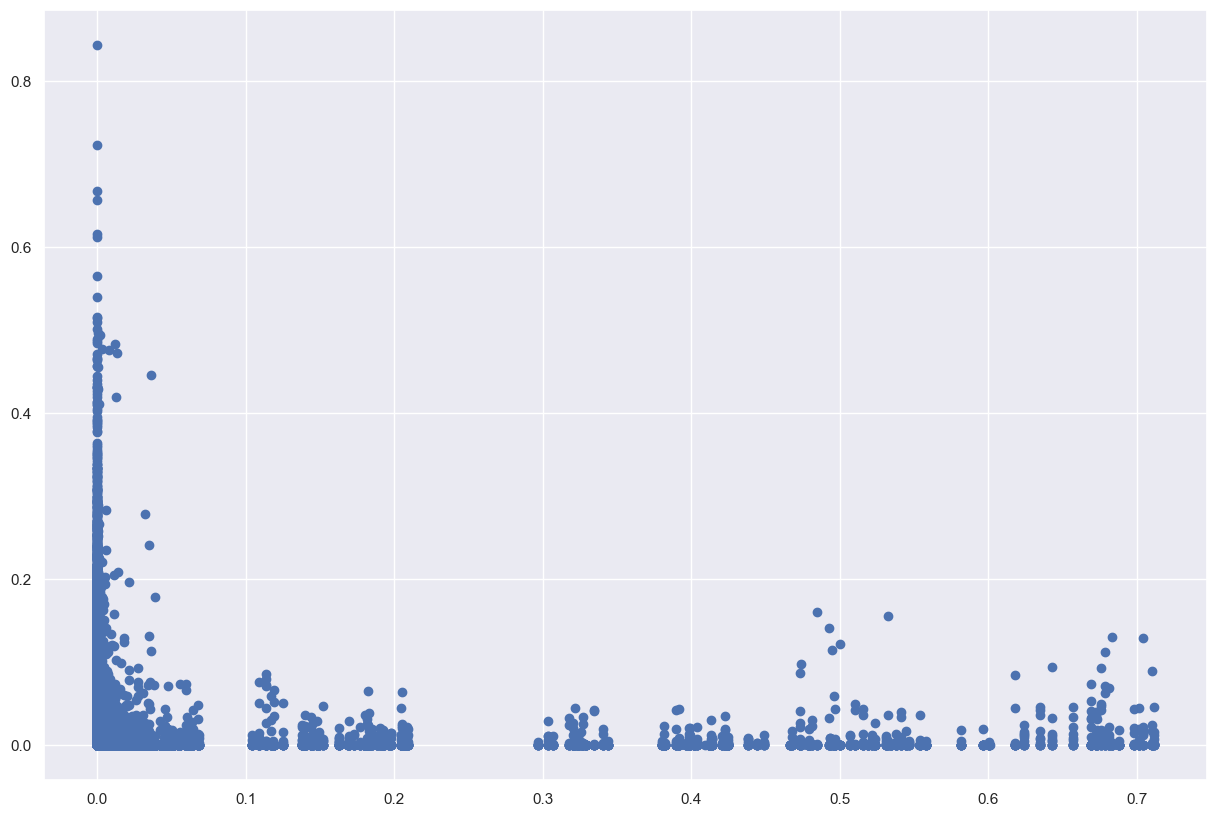

In [51]:
plt.scatter(x=df1['landcover_2'], y=df1['burn_area']);

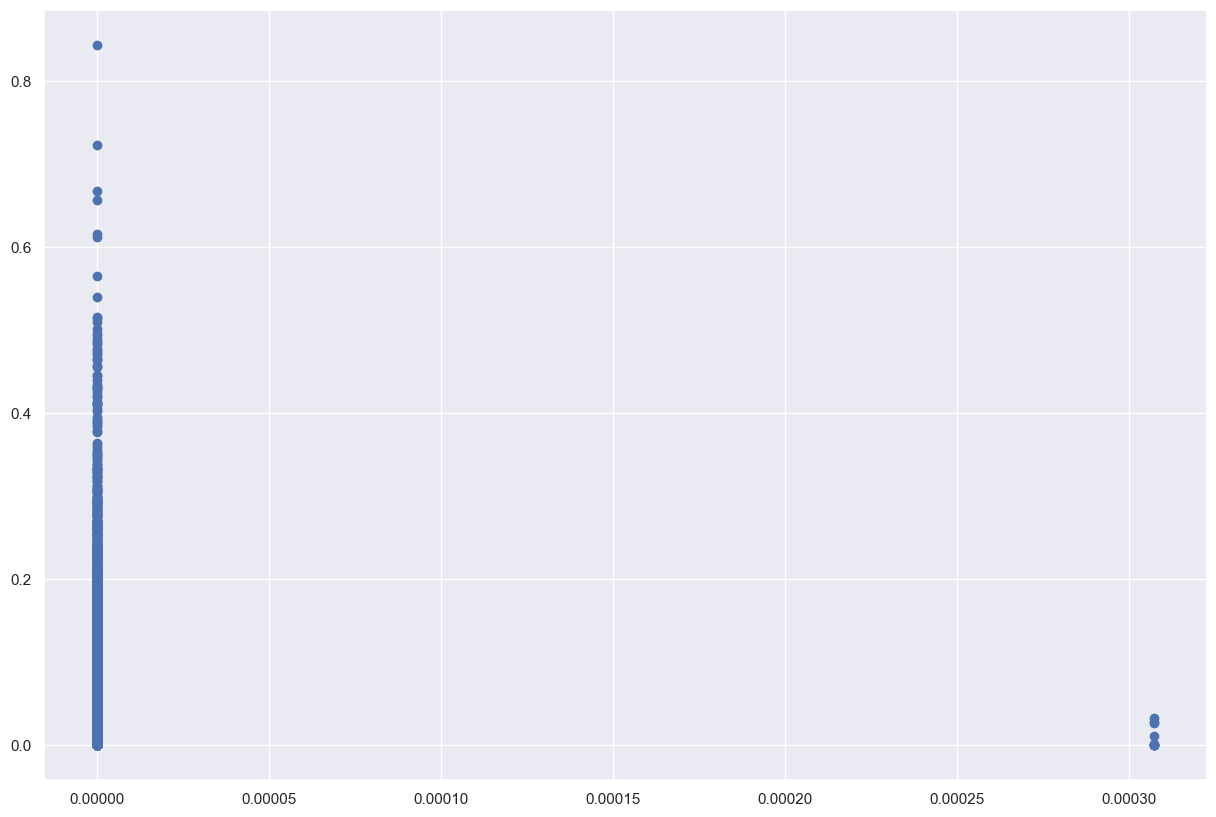

In [52]:
plt.scatter(x=df1['landcover_3'], y=df1['burn_area']);

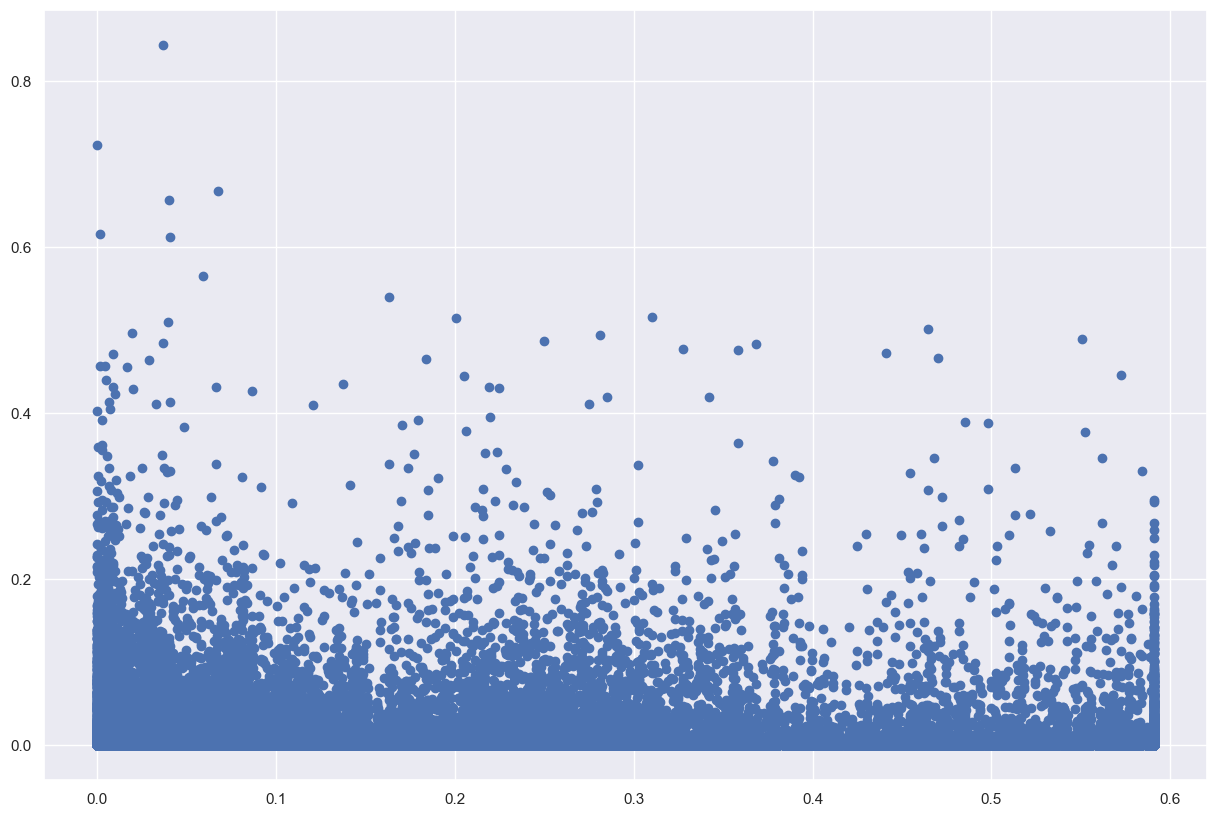

In [53]:
plt.scatter(x=df1['landcover_4'], y=df1['burn_area']);

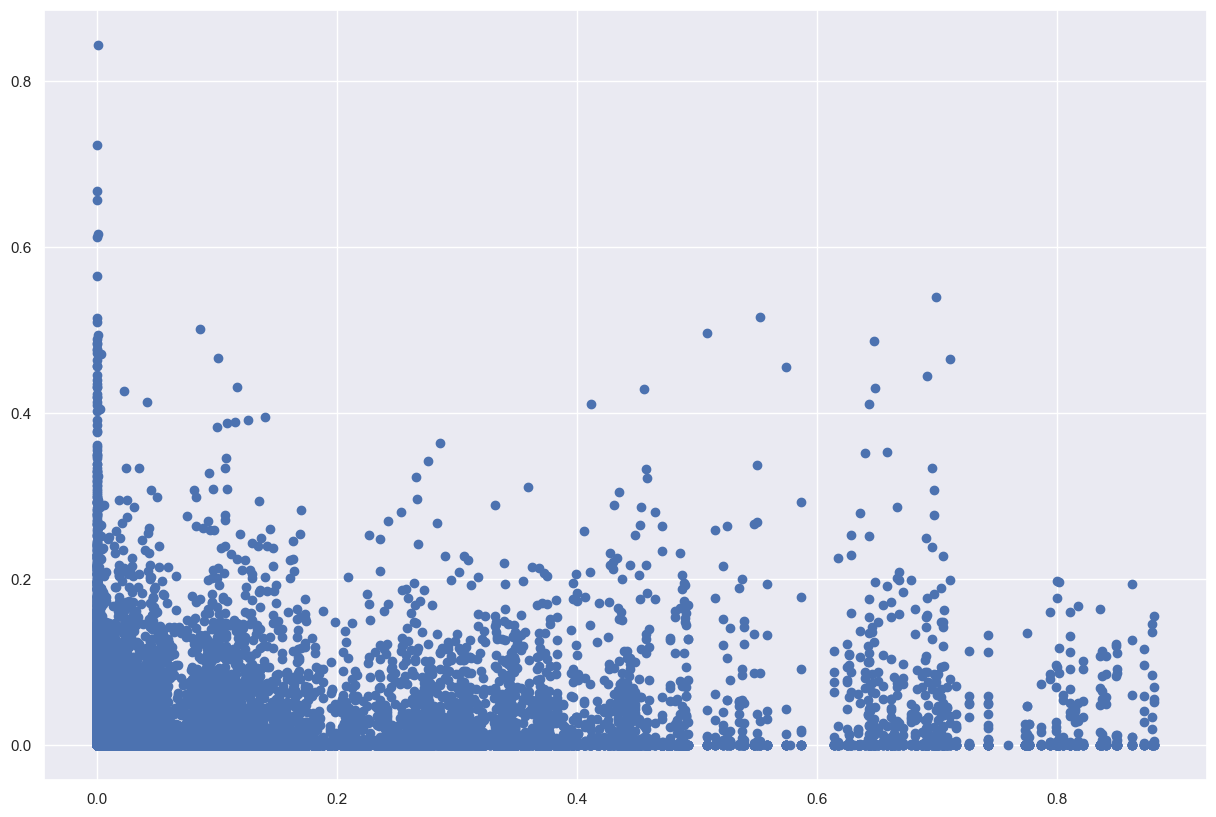

In [54]:
plt.scatter(x=df1['landcover_5'], y=df1['burn_area']);

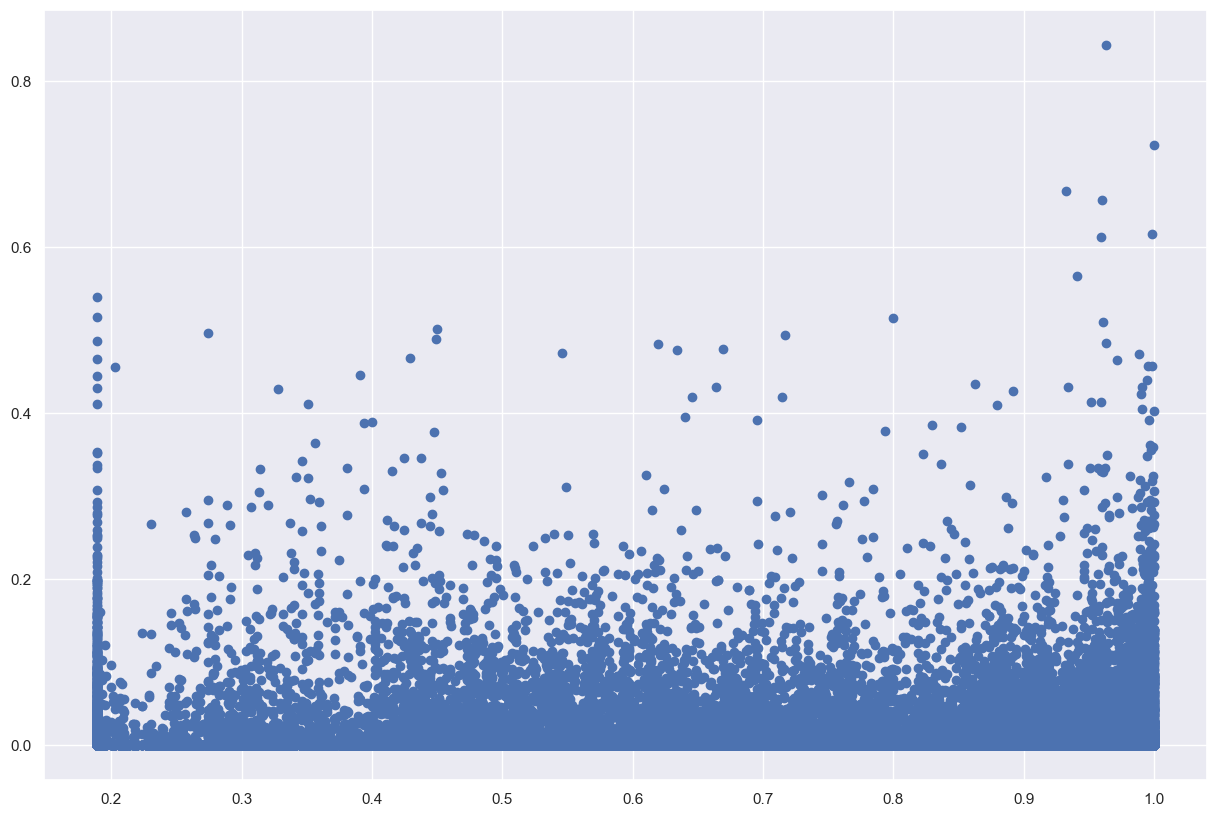

In [55]:
plt.scatter(x=df1['landcover_6'], y=df1['burn_area']);

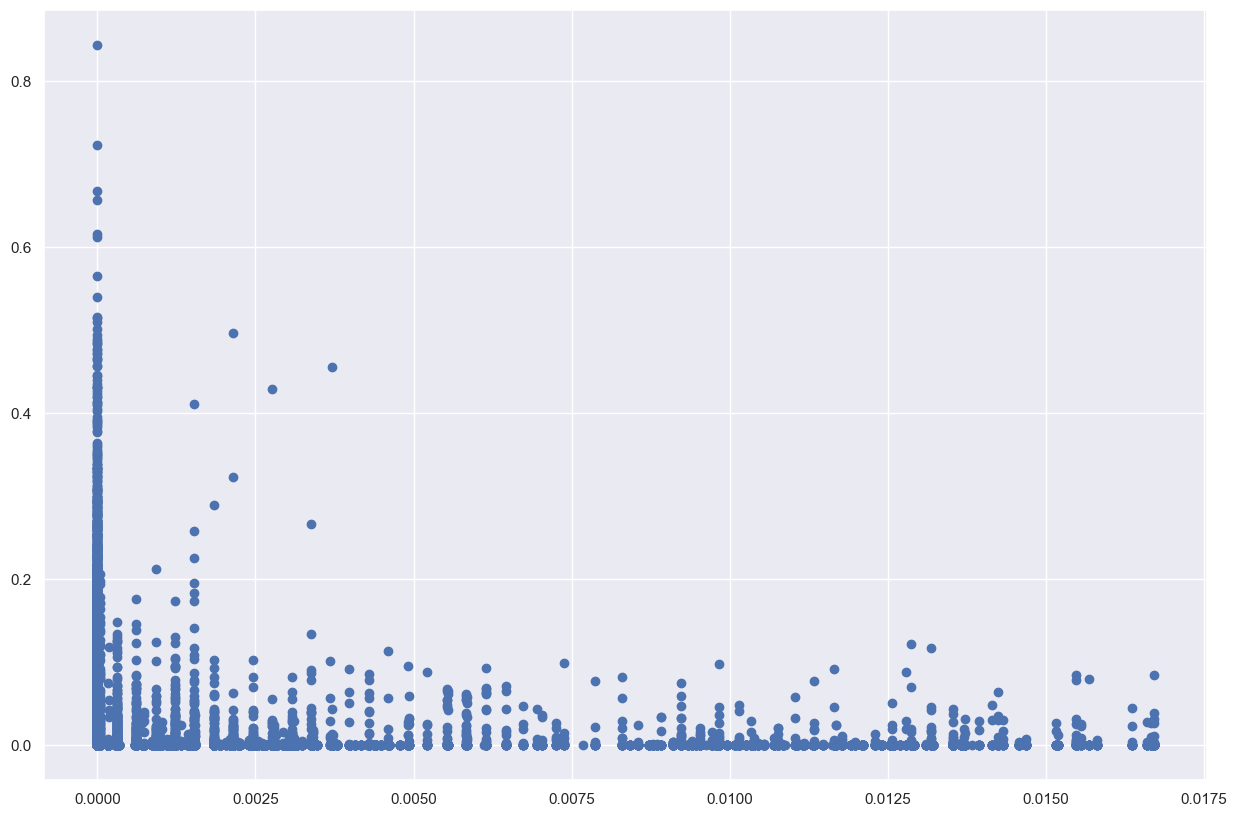

In [56]:
plt.scatter(x=df1['landcover_7'], y=df1['burn_area']);

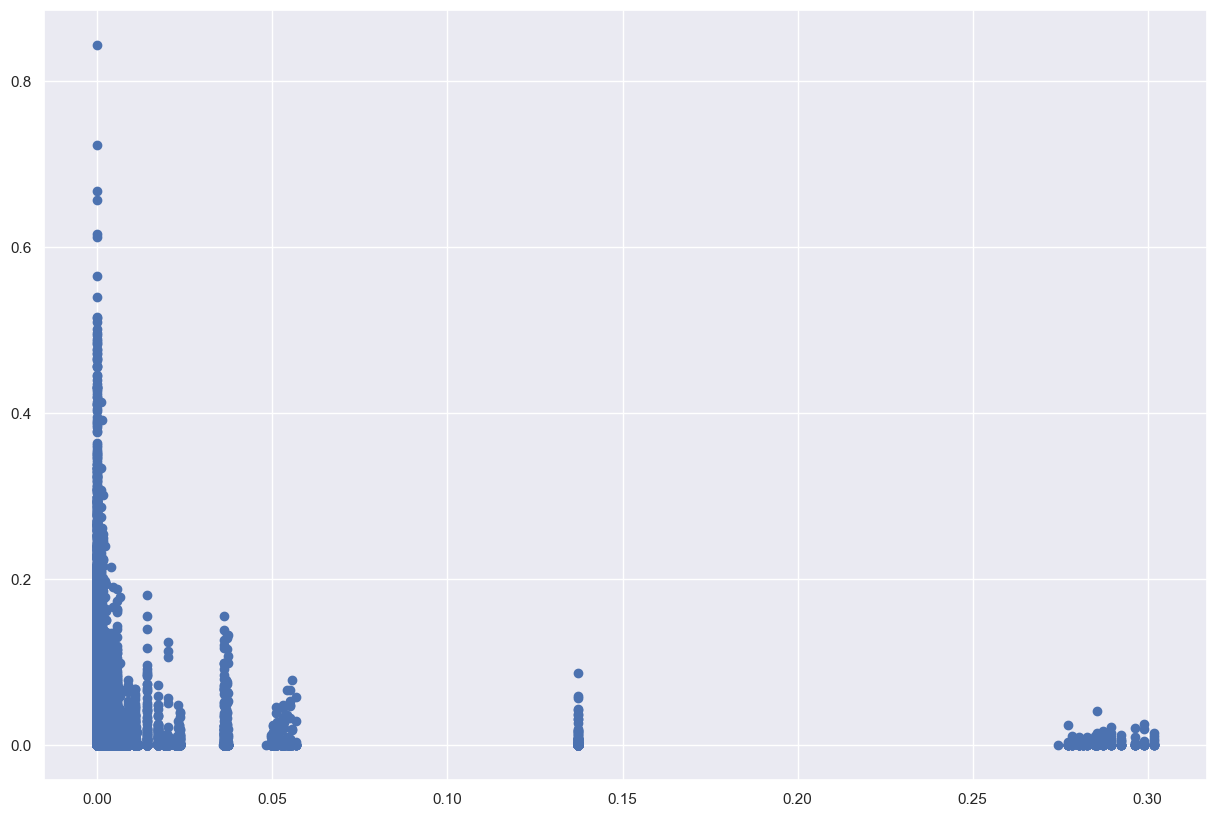

In [57]:
plt.scatter(x=df1['landcover_8'], y=df1['burn_area']);

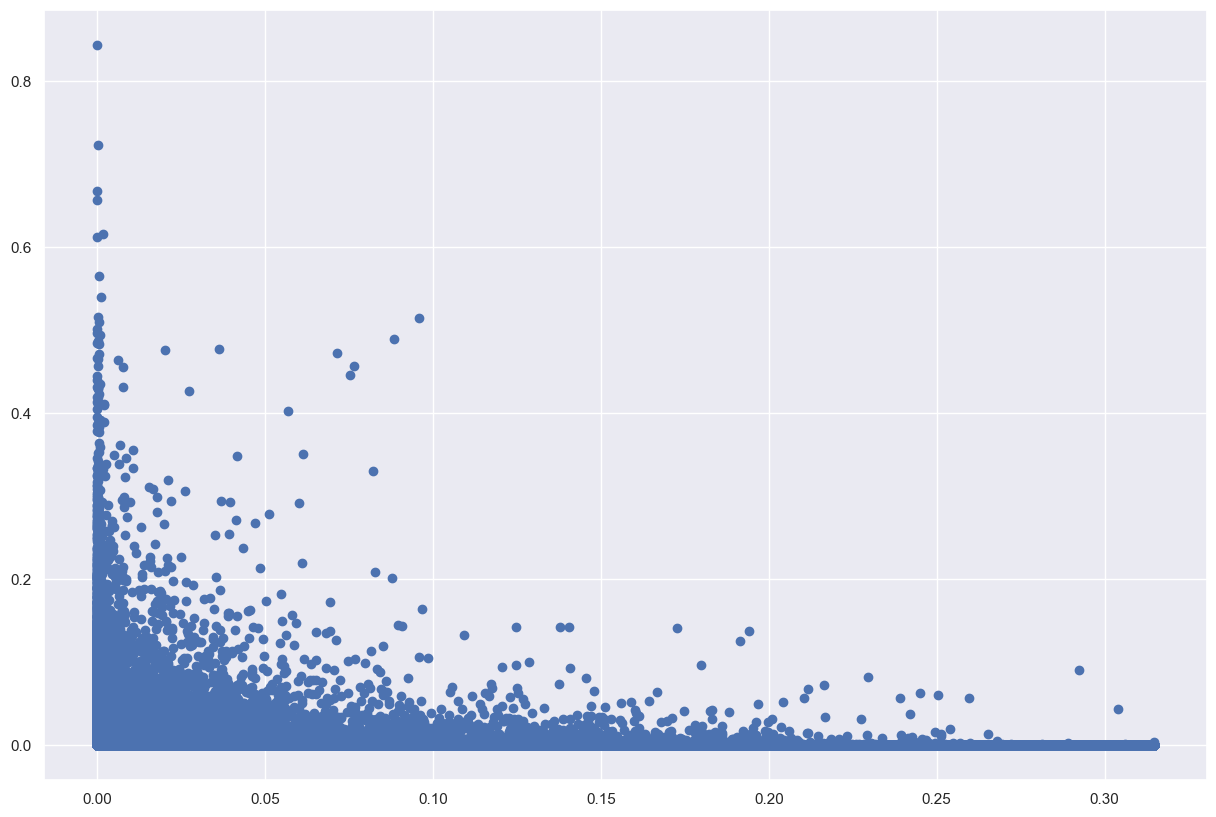

In [58]:
plt.scatter(x=df1['precipitation'], y=df1['burn_area']);

Some Features showed no correlation wit the target variable so we need to remove them

In [59]:
not_related_features=['landcover_0','landcover_1','landcover_2','landcover_3',
                      'landcover_7','landcover_8'
                      
                     ]

In [60]:
df13.drop(columns=not_related_features, inplace=True)

In [61]:
df13.head()

lat        lon  burn_area  climate_aet  climate_def  climate_pdsi  \
0 -15.858835  29.237029        0.0         1195            0           263   
1 -15.858835  29.487029        0.0         1196            0           232   
2 -15.858835  29.737029        0.0         1190            0           314   
3 -15.858835  29.987029        0.0         1144            0           321   
4 -15.858835  30.237029        0.0         1187            0           413   

   climate_pet  climate_pr  climate_ro  climate_soil  climate_srad  \
0         1195         206          10          1692          1861   
1         1196         201          10          1859          1867   
2         1190         192          10          1677          1861   
3         1144         186          66          1061          1864   
4         1187         186           9          1714          1852   

   climate_tmmn  climate_tmmx  climate_vap  climate_vpd  climate_vs  \
0           211           317         2493        111.0         141   
1           211           318         2497        112.0         138   
2           208           317         2486        109.0         141   
3           196           303         2333         98.0         124   
4           204           314         2426        109.0         145   

    elevation  landcover_4  landcover_5  landcover_6  precipitation  
0  413.474762     0.591030     0.012174     0.244890       0.256932  
1  429.034543     0.591030     0.000095     0.345121       0.273093  
2  477.246432     0.516421     0.000000     0.483579       0.285109  
3  646.388681     0.299000     0.163902     0.537098       0.298418  
4  582.340637     0.277392     0.067742     0.654866       0.314772

Plotting heatmaps to see how the colleration is going

In [62]:
df13.columns

Index(['lat', 'lon', 'burn_area', 'climate_aet', 'climate_def', 'climate_pdsi',
       'climate_pet', 'climate_pr', 'climate_ro', 'climate_soil',
       'climate_srad', 'climate_tmmn', 'climate_tmmx', 'climate_vap',
       'climate_vpd', 'climate_vs', 'elevation', 'landcover_4', 'landcover_5',
       'landcover_6', 'precipitation'],
      dtype='object')

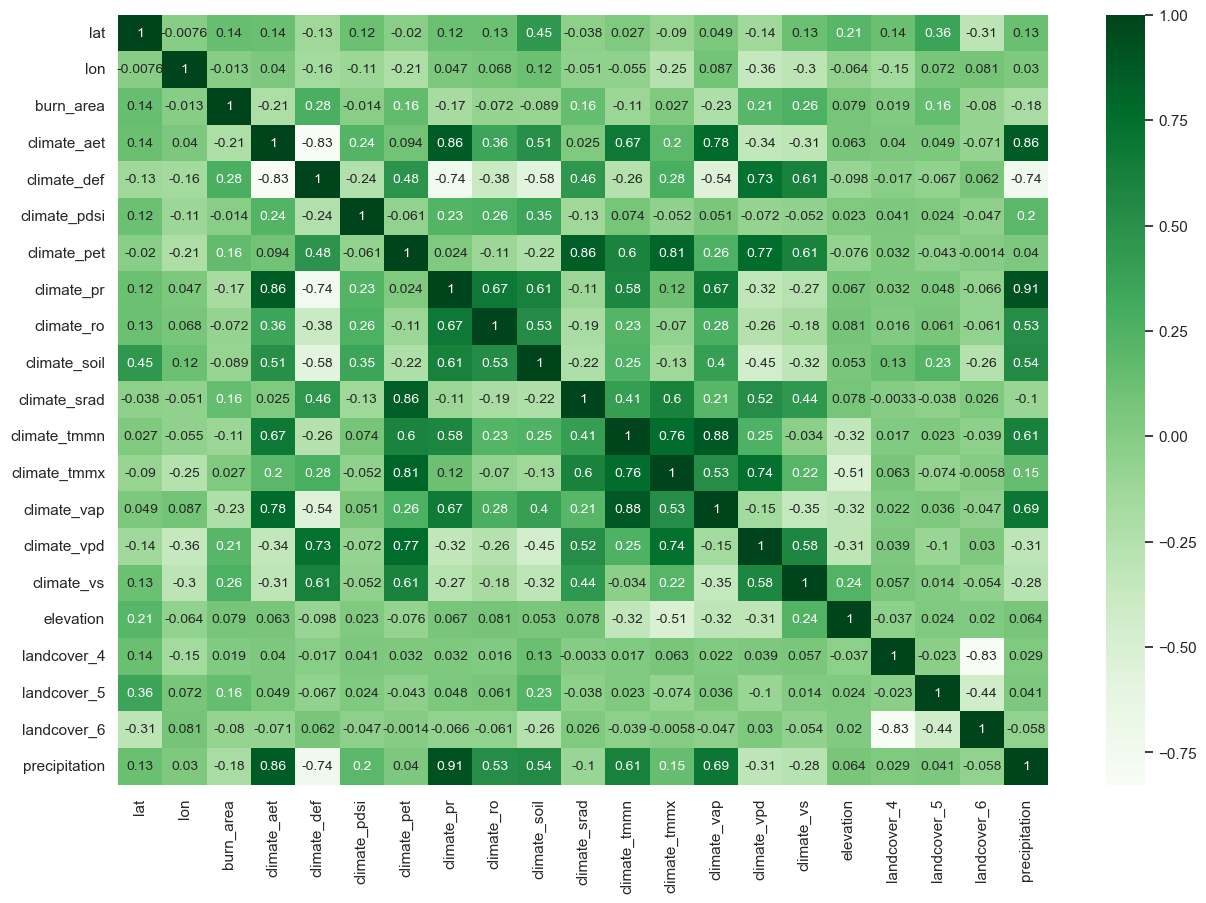

In [63]:
sns.set(rc={'figure.figsize':(15,10)})
n_variables=['lat', 'lon', 'burn_area', 'climate_aet', 'climate_def', 'climate_pdsi',
       'climate_pet', 'climate_pr', 'climate_ro', 'climate_soil',
       'climate_srad', 'climate_tmmn', 'climate_tmmx', 'climate_vap',
       'climate_vpd', 'climate_vs', 'elevation', 'landcover_4', 'landcover_5',
       'landcover_6', 'precipitation']
pc=df13[n_variables].corr(method='pearson')
cols=n_variables
ax=sns.heatmap(pc, annot=True,
               yticklabels=cols,
               xticklabels=cols,
               annot_kws={'size':10},
               cmap='Greens'
              )

In [64]:
# Calculate the correlation matrix
correlation_matrix = df13.corr()

# Set a threshold for considering features as highly correlated (e.g., 0.8)
threshold = 0.8

# Find pairs of features with correlation above the threshold
high_corr_pairs = correlation_matrix.unstack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[(abs(high_corr_pairs['Correlation']) > threshold) & (high_corr_pairs['Feature1'] != high_corr_pairs['Feature2'])]

print(high_corr_pairs)


          Feature1       Feature2  Correlation
67     climate_aet    climate_def    -0.826995
70     climate_aet     climate_pr     0.860953
83     climate_aet  precipitation     0.863728
87     climate_def    climate_aet    -0.826995
136    climate_pet   climate_srad     0.856443
138    climate_pet   climate_tmmx     0.810823
150     climate_pr    climate_aet     0.860953
167     climate_pr  precipitation     0.912861
216   climate_srad    climate_pet     0.856443
244   climate_tmmn    climate_vap     0.879654
258   climate_tmmx    climate_pet     0.810823
284    climate_vap   climate_tmmn     0.879654
376    landcover_4    landcover_6    -0.825080
416    landcover_6    landcover_4    -0.825080
423  precipitation    climate_aet     0.863728
427  precipitation     climate_pr     0.912861


# Feature Engineering

Adding new features based on their relationships

In [66]:
df13['average_temperature'] = (df13['climate_tmmx'] + df13['climate_tmmn'])/2
df13['precipitation_Xrate'] = df13['precipitation'] * df13['climate_pr']
df13['total_climate'] = df13[['climate_aet', 'climate_pdsi', 'climate_ro', 'climate_soil', 'climate_vpd', 'climate_vs']].sum(axis=1)
df13['climate_soil_interaction'] = df13['climate_soil'] * df13['climate_aet']
df13['temp_precip_interaction'] = df13['average_temperature'] * df13['precipitation_Xrate']


Columns to drop based on muulticorrelation

In [67]:

features_to_drop = ['climate_def', 'climate_srad', 'climate_tmmx', 
                    'climate_vap', 'landcover_4', 'precipitation','climate_tmmn','climate_pr','climate_pet']


df13 = df13.drop(columns=features_to_drop)


print(df13.shape)


(81838, 17)


In [68]:
df13.columns

Index(['lat', 'lon', 'burn_area', 'climate_aet', 'climate_pdsi', 'climate_ro',
       'climate_soil', 'climate_vpd', 'climate_vs', 'elevation', 'landcover_5',
       'landcover_6', 'average_temperature', 'precipitation_Xrate',
       'total_climate', 'climate_soil_interaction', 'temp_precip_interaction'],
      dtype='object')

Checking the relationships using a heatmap

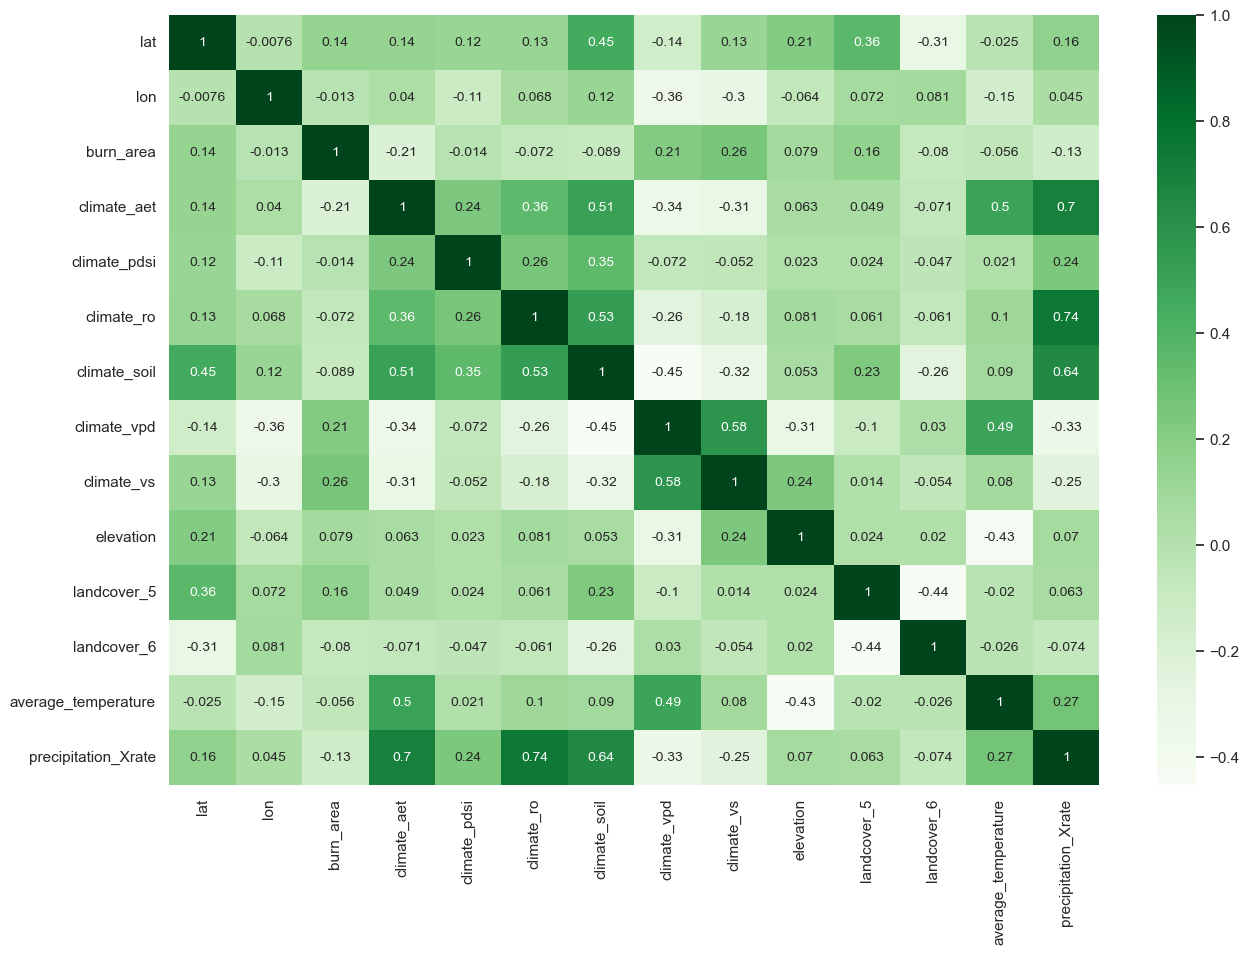

In [69]:
sns.set(rc={'figure.figsize':(15,10)})
n_variables=['lat', 'lon', 'burn_area', 'climate_aet', 'climate_pdsi', 'climate_ro',
       'climate_soil', 'climate_vpd', 'climate_vs', 'elevation', 'landcover_5',
       'landcover_6', 'average_temperature', 'precipitation_Xrate']
pc=df13[n_variables].corr(method='pearson')
cols=n_variables
ax=sns.heatmap(pc, annot=True,
               yticklabels=cols,
               xticklabels=cols,
               annot_kws={'size':10},
               cmap='Greens'
              )

Checking the threshold of 0.7 to see if there is multicollianityy which will help us to see what we can do about it

In [70]:

correlation_matrix = df13.corr()


threshold = 0.7


high_corr_pairs = correlation_matrix.unstack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[(abs(high_corr_pairs['Correlation']) > threshold) & (high_corr_pairs['Feature1'] != high_corr_pairs['Feature2'])]

print(high_corr_pairs)

                     Feature1                  Feature2  Correlation
64                climate_aet       precipitation_Xrate     0.702574
65                climate_aet             total_climate     0.839394
67                climate_aet   temp_precip_interaction     0.714031
98                 climate_ro       precipitation_Xrate     0.743010
101                climate_ro   temp_precip_interaction     0.715377
116              climate_soil             total_climate     0.829638
117              climate_soil  climate_soil_interaction     0.955784
224       precipitation_Xrate               climate_aet     0.702574
226       precipitation_Xrate                climate_ro     0.743010
235       precipitation_Xrate             total_climate     0.751261
236       precipitation_Xrate  climate_soil_interaction     0.739250
237       precipitation_Xrate   temp_precip_interaction     0.995021
241             total_climate               climate_aet     0.839394
244             total_climate     

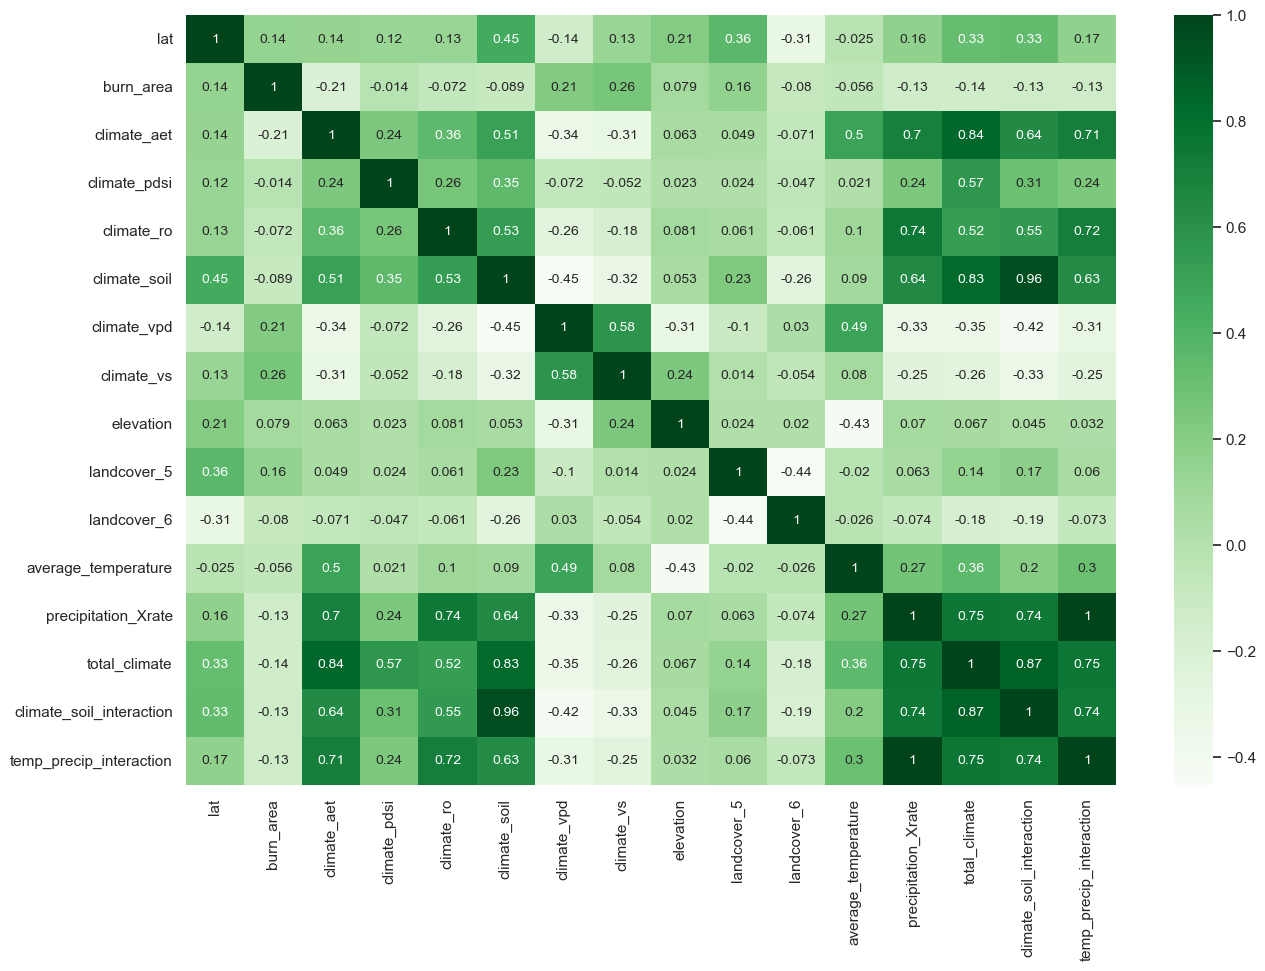

In [71]:
sns.set(rc={'figure.figsize':(15,10)})
n_variables=['lat', 'burn_area', 'climate_aet', 'climate_pdsi', 'climate_ro',
       'climate_soil', 'climate_vpd', 'climate_vs', 'elevation', 'landcover_5',
       'landcover_6', 'average_temperature', 'precipitation_Xrate',
        'total_climate', 'climate_soil_interaction',
       'temp_precip_interaction']
pc=df13[n_variables].corr(method='pearson')
cols=n_variables
ax=sns.heatmap(pc, annot=True,
               yticklabels=cols,
               xticklabels=cols,
               annot_kws={'size':10},
               cmap='Greens'
              )

In [72]:
df13.head()

lat        lon  burn_area  climate_aet  climate_pdsi  climate_ro  \
0 -15.858835  29.237029        0.0         1195           263          10   
1 -15.858835  29.487029        0.0         1196           232          10   
2 -15.858835  29.737029        0.0         1190           314          10   
3 -15.858835  29.987029        0.0         1144           321          66   
4 -15.858835  30.237029        0.0         1187           413           9   

   climate_soil  climate_vpd  climate_vs   elevation  landcover_5  \
0          1692        111.0         141  413.474762     0.012174   
1          1859        112.0         138  429.034543     0.000095   
2          1677        109.0         141  477.246432     0.000000   
3          1061         98.0         124  646.388681     0.163902   
4          1714        109.0         145  582.340637     0.067742   

   landcover_6  average_temperature  precipitation_Xrate  total_climate  \
0     0.244890                264.0            52.928035         3412.0   
1     0.345121                264.5            54.891625         3547.0   
2     0.483579                262.5            54.740839         3441.0   
3     0.537098                249.5            55.505812         2814.0   
4     0.654866                259.0            58.547660         3577.0   

   climate_soil_interaction  temp_precip_interaction  
0                   2021940             13973.001129  
1                   2223364             14518.834729  
2                   1995630             14369.470245  
3                   1213784             13848.700159  
4                   2034518             15163.843932

features to be trained on

In [74]:
df13.columns

Index(['lat', 'lon', 'burn_area', 'climate_aet', 'climate_pdsi', 'climate_ro',
       'climate_soil', 'climate_vpd', 'climate_vs', 'elevation', 'landcover_5',
       'landcover_6', 'average_temperature', 'precipitation_Xrate',
       'total_climate', 'climate_soil_interaction', 'temp_precip_interaction'],
      dtype='object')

In [107]:
features=['lat', 'lon', 'climate_aet', 'climate_pdsi', 'climate_ro',
        'climate_vpd', 'climate_vs', 'elevation', 'landcover_5',
       'landcover_6', 'average_temperature', 'precipitation_Xrate',
       'total_climate', 'climate_soil_interaction', 'temp_precip_interaction']
# features=['temp_precip_interaction','precipitation_Xrate','landcover_5',                
# 'climate_vs',              
# 'lat',                        
# 'elevation',                   
# 'lon',                         
# 'climate_soil_interaction' ]

In [108]:
df13_features=df13[features]

# Loading a test dataset

In [109]:
test=pd.read_csv(r"C:\Users\Ethel\Downloads\Zindi First hackathon\Test.csv")

In [110]:
test.columns

Index(['ID', 'lat', 'lon', 'climate_aet', 'climate_def', 'climate_pdsi',
       'climate_pet', 'climate_pr', 'climate_ro', 'climate_soil',
       'climate_srad', 'climate_swe', 'climate_tmmn', 'climate_tmmx',
       'climate_vap', 'climate_vpd', 'climate_vs', 'elevation', 'landcover_0',
       'landcover_1', 'landcover_2', 'landcover_3', 'landcover_4',
       'landcover_5', 'landcover_6', 'landcover_7', 'landcover_8',
       'precipitation'],
      dtype='object')

Adding new columns to the test data

In [111]:
test['average_temperature'] = (test['climate_tmmx'] + test['climate_tmmn'])/2
test['precipitation_Xrate'] = test['precipitation'] * test['climate_pr']
test['total_climate'] = test[['climate_aet', 'climate_pdsi', 'climate_ro', 'climate_soil', 'climate_vpd', 'climate_vs']].sum(axis=1)
test['climate_soil_interaction'] =test['climate_soil'] * test['climate_aet']
test['temp_precip_interaction'] = test['average_temperature'] * test['precipitation_Xrate']


In [112]:
selected=['lat', 'lon', 'climate_aet', 'climate_pdsi', 'climate_ro',
        'climate_vpd', 'climate_vs', 'elevation', 'landcover_5',
       'landcover_6', 'average_temperature', 'precipitation_Xrate',
       'total_climate', 'climate_soil_interaction', 'temp_precip_interaction']
# selected=['temp_precip_interaction','precipitation_Xrate','landcover_5',                
# 'climate_vs',              
# 'lat',                        
# 'elevation',                   
# 'lon',                         
# 'climate_soil_interaction' ]

In [113]:
test_selected=test[selected]

# Splitting data to X and Y

In [114]:
target=['burn_area']
X_train=df13[features]
y_train=df13[target]

In [115]:
print(f"Shape of X: {X_train.shape}")
print(f"Shape of y: {y_train.shape}")

Shape of X: (81838, 15)
Shape of y: (81838, 1)


In [116]:
X_train.shape, test_selected.shape

((81838, 15), (25584, 15))

# Scalling our data

In [117]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_selected)

# Making our baseline Model

In [119]:
y_mean=y_train.mean()
y_pred_baseline=[y_mean]*len(y_train)

In [120]:
print('Baseline MAE:', mean_absolute_error(y_train, y_pred_baseline))

Baseline MAE: 0.012391046272909718


# Running a linear Regression Model

In [121]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [122]:
y_pred = model.predict(X_test_scaled)

In [123]:
# Predicting
y_pred = model.predict(X_test_scaled)

y_pred_train = model.predict(X_train_scaled)
#Evaluation
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print(f"R2 score on the training data: {r2_train}")
print(f"RMSE on the training data: {rmse_train}")

R2 score on the training data: 0.14843650174838263
RMSE on the training data: 0.026431827062126656


The linear Regression performed poorly
Lets try another model X_boost regressor

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define the model
xgb_model = XGBRegressor(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [200, 400, 600, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10, 15],
    'min_child_weight': [1, 3, 5, 7, 10],
    'gamma': [0, 0.1, 0.5, 1],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_distributions, n_iter=50, cv=3, random_state=42, scoring='r2', n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions
y_pred_train1 = best_xgb_model.predict(X_train_scaled)
y_pred_test1 = best_xgb_model.predict(X_test_scaled)

# Evaluate the model
print(f"Best parameters found: {random_search.best_params_}")
print(f"R² on the training data: {r2_score(y_train, y_pred_train1)}")
print(f"MAE on the training data: {mean_absolute_error(y_train, y_pred_train1)}")
print(f"RMSE on the training data: {np.sqrt(mean_squared_error(y_train, y_pred_train1))}")
print(f"RMSE on the training data: {np.sqrt(mean_squared_error(y_train, y_pred_train1))}")

Best parameters found: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 600, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}
R² on the training data: 0.6020892945280161
MAE on the training data: 0.006031133610377042
RMSE on the training data: 0.018068058052656908
RMSE on the training data: 0.018068058052656908


Loading the Sample subimission file to get inspiration

In [125]:
sample_submission=pd.read_csv(r"C:\Users\Ethel\Downloads\Zindi First hackathon\SampleSubmission.csv")
sample_submission

ID  burn_area
0        0_2014-01-01          0
1        1_2014-01-01          0
2        2_2014-01-01          0
3        3_2014-01-01          0
4        4_2014-01-01          0
...               ...        ...
25579  528_2017-12-01          0
25580  529_2017-12-01          0
25581  530_2017-12-01          0
25582  531_2017-12-01          0
25583  532_2017-12-01          0

[25584 rows x 2 columns]

In [126]:
# Add to submission dataframe
sample_submission['burn_area'] = y_pred_test1

# Depending on your model, you may have some predictions that don't make sense. Let's constrain our predictions to the range (0, 1)
sample_submission['burn_area'] =sample_submission['burn_area'].clip(0, 1)

# View
sample_submission.head()

ID  burn_area
0  0_2014-01-01   0.000781
1  1_2014-01-01   0.000000
2  2_2014-01-01   0.002226
3  3_2014-01-01   0.002293
4  4_2014-01-01   0.001365

In [127]:
# Save ready for submission:
sample_submission.to_csv('9_sumission.csv', index=False)

Tuning our model

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define the model
xgb_model = XGBRegressor(random_state=42)

# Define a reduced parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [200, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 7, 10],
    'min_child_weight': [1, 5],
    'subsample': [0.8, 1.0]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model, 
    param_grid=param_grid, 
    cv=5,  # reduced number of folds
    scoring='r2', 
    n_jobs=-1, 
    verbose=1
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions
y_pred_train = best_xgb_model.predict(X_train_scaled)
y_pred_test1 = best_xgb_model.predict(X_test_scaled)

# Evaluate the model
print(f"Best parameters found: {grid_search.best_params_}")
print(f"R² on the training data: {r2_score(y_train, y_pred_train)}")
print(f"MAE on the training data: {mean_absolute_error(y_train, y_pred_train)}")
print(f"RMSE on the training data: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
